<a href="https://colab.research.google.com/github/NaiaraSanz/Tesis_Emotivismo_Polarizacion_Topicmodelling_Twitter/blob/main/Tesis_Leysiessi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalar librerías

In [1]:
!pip install --upgrade accelerate


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 2.4 MB/s eta 0:00:00


In [2]:
!pip install --upgrade pip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [3]:
!pip install pysentimiento
from pysentimiento import create_analyzer
analyzer_sentiment = create_analyzer(task="sentiment", lang="es")
analyzer_hate=create_analyzer(task="hate_speech", lang="es")
analyzer_emotion=create_analyzer(task="emotion", lang="es")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.1 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=c1ce131c4583d76773d11860d6fba679c57370260e71a96c801a0d64652888dc
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 10.0.1
    Uninstalling pyarrow-10.0.1:
      Successfully uninstalled pyarrow-10.0.1
  Attempting uninstall: accelerate
  

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/925 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/956 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

In [4]:
!pip install emoji
import emoji

In [5]:
!pip install spacy
!python -m spacy download es_core_news_lg
import spacy

nlp = spacy.load("es_core_news_lg")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 1.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')


In [6]:
!pip install gensim
import gensim
from gensim.parsing.preprocessing import remove_stopwords, strip_punctuation, preprocess_string, strip_short, stem_text
from gensim import corpora

from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
from pprint import pprint

In [7]:
!pip install nltk


In [8]:
import nltk
nltk.download('all')
from nltk.corpus import opinion_lexicon
opinion_lexicon.ensure_loaded()


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [9]:
#!pip install pandas==1.2.2  # Se necesita para evitar un error de incompatibilidad
!pip install pandas
import pandas as pd

In [10]:
!pip install openpyxl
from openpyxl import Workbook
import openpyxl

In [11]:
!pip install numpy==1.20.1  --no-input # Se necesita para evitar un error de incompatibilidad


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 24.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for numpy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for numpy
Failed to build numpy
ERROR: Could not build wheels for numpy, which is required to install pyproject.toml-based projects


In [12]:
!pip install gensim

In [13]:
!pip install matplotlib

In [14]:
!pip install joblib==1.1.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.3.2
    Uninstalling joblib-1.3.2:
      Successfully uninstalled joblib-1.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.10.1 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.
scikit-learn 1.2.2 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.


In [15]:
#!pip install pyLDAvis==3.3.0
#!pip install git+https://github.com/bmabey/pyLDAvis.git #Esto instalará pyLDAvis directamente desde el repositorio en GitHub y puede ayudar a evitar el problema de instalación que estás enfrentando.
!pip install pyLDAvis==2.1.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97718 sha256=bf6067421971132d0d6e81c03f877d85fe3a809057ca2d01a9adcaec6544f719
  Stored in directory: /root/.cache/pip/wheels/d9/93/d6/16c95da19c32f037fd75135ea152d0df37254c25cd1a8b4b6c
Successfully built pyLDAvis


In [16]:
#!pip install scipy==1.6.0 --no-input # Se necesita para evitar un error de incompatibilidad
#!pip install --upgrade scipy
!pip install --upgrade gensim


In [17]:
#para nubes de palabras
!pip install wordcloud matplotlib


In [18]:
!pip install spanlp


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 733.3 kB/s eta 0:00:00


#Stopwords y puntuación.

In [ ]:
import nltk
from nltk.corpus import stopwords

# Descargar la lista de stopwords en español de NLTK
nltk.download('stopwords')

# Definir la lista de conectores y verbos a eliminar
connectorslist = ['a propósito', 'ahora bien', 'de hecho', 'debido a', 'en cambio', 'en cualquier caso', 'en realidad', 'en todo caso', 'es decir', 'no obstante', 'o sea', 'pero', 'por el contrario', 'por eso', 'por lo tanto', 'por qué', 'por tanto', 'porque', 'sin embargo', 'a/p', 'a.b.', 'd/f', 'd/a', 'e/c', 'e/cc', 'e/r', 'e/tc', 'es.d.', 'n/o', 'o.s.', 'p.', 'p/ec', 'p/e', 'p/lt', 'p/q', 'p/t', 'pq', 's/e', 'xk', 'xq', 'pa', 'pa\'', 'q', 'ke', 'cn', 'kn', 'cm', 'komo', 'smpre', 'smp', 'aunk', 'aunk', 'kuando', 'kuándo', 'entons', 'entcs', 'mientrs', 'mnts', 'dsd', 'dezde', 'asta', 'ast', 'aunq', 'aunke', '+', 'mas', '-', 'mns']

vbslist = ['considerar', 'creer', 'cuestionar', 'discutir', 'explicar', 'imaginar', 'opinar', 'pensar', 'proponer',
           'sospechar', 'sostener', 'suponer']

# Obtener la lista de stopwords original de NLTK
stopwords_spanish = stopwords.words('spanish')

# Crear una nueva lista de stopwords sin los conectores y verbos conjugados
new_stopwords = [word for word in stopwords_spanish if word not in connectorslist and word not in vbslist]

# Imprimir la nueva lista de stopwords
print(new_stopwords)




['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'esté', 'estés', 'es

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import spacy
from spacy.lang.es import Spanish

nlp = Spanish()

# Obtiene la lista de signos de puntuación actual
punctuations = nlp.Defaults.tokenizer_exceptions.get('punct', [])

# Crea una nueva lista sin las exclamaciones e interrogaciones
new_punctuations = [punct for punct in punctuations if punct[0] not in ['¡', '!', '¿', '?']]

# Actualiza la lista de signos de puntuación con la nueva lista
nlp.Defaults.tokenizer_exceptions['punct'] = new_punctuations





/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Cargar los archivos y transformarlos y limpiar lista

In [ ]:
def loadText(path):
    file = open(path, "r") #abrir archivo modo lectura
    all_text = file.read() #guardar contenido archivo en un string (leer archivo)
    texts_list = all_text.split("\n") #lista sin intros, al contrario como lo he escrito en el archivo
    file.close() #cierro archivo
    texts_list.pop()#quitar último elemento de la lista porque es un intro
    return texts_list #devuelvo lista de texto

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import json

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def loadTuits(path):
    tuits = []
    with open(path, 'r') as openfile:
        for line in openfile:
            jsonLoaded = json.loads(line)
            tuits.append(jsonLoaded)
    return tuits

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def deJSONaText(listaTuits):
    lista_resultado = []
    for tuit in listaTuits:
        texto = tuit["text"]
        lista_resultado.append(texto)
    return lista_resultado

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def limpiarTextos(textos):
  lista_resultado = []
  for texto in textos:
    lista_resultado.append(limpiar(texto))
  return lista_resultado

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import re

def limpiar(frase):
    # Reemplazar los espacios dentro de las menciones de usuario
    frase = re.sub(r'@(\S+)', lambda m: '@' + m.group(1).replace(' ', ''), frase)
    # Tokenizar la frase sin dividir las menciones de usuario, los enlaces, y considerando exclamaciones, interrogaciones y emoticonos
    tokens = re.findall(r'(?:https?://\S+)|\w+|[@#]\w+|[¡!¿?]|[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF]', frase)
    # Filtrar los tokens que no están en la lista de stopwords personalizadas ni en la lista de puntuación
    tokens_filtrados = [token for token in tokens if token not in new_stopwords and token not in new_punctuations]
    # Unir los tokens limpios en una frase
    frase_limpia = ' '.join(tokens_filtrados)
    return frase_limpia



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def saveText(path, textos_limpios): #ruta donde escribir texto OJO SOBREESCRIBIR y la variable del texto que quiero meter
    file = open(path, "w")
    for texto in textos_limpios:
        file.write(texto + '\n')
    file.close()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Ejecución

In [ ]:
# Cargamos los tuits desde el archivo.
tuits = loadTuits('/content/tweets')
# Convertimos los tuits de formato JSON a texto plano.
textos = deJSONaText(tuits)
# Guardamos los textos originales en un archivo CSV antes de limpiarlos.
with open("/content/tweetsoriginales.csv", mode='w', newline='', encoding='utf-8') as archivo_csv:
    escritor_csv = csv.writer(archivo_csv)
    for texto in textos:
        escritor_csv.writerow([texto])  # Cada texto es un tuit individual

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['@guillena3 A LA ALTURA DE UN GRAN PAÍS Un bajísimo Feiijo Le falta letrero atril', 'No baje brazos Don Gonzalo 💪 🙏 https://t.co/cm4gDHAOJh', '@YeraySurezZamo1 @jesusperea1 @PabloIglesias Es interesa Reducir debate básico buscar solo enfrentamiento ciudadanos Así triste política actual 🏻', 'Vamos Messi ! Vamos gallardo !', 'Neymar Pity 😘', '@nlopeztrujillo @lauragarciagon De propia página web Director médico trabaja El clínico hospital público supuestamente objetores pero curiosamente conciertos IVE clínica https://t.co/SsqT8lkq62', '@iescolar Estaba cantado', '@PajaraMala @elnotadeaqui El tito negre dado cuenta pueden gustar hombres seguir siendo hombre', 'Galtier vs Gallardo gt gt gt gt gt gt gt Messi vs cr7', '@MVTARDE El q vulneraba ley protoco q firmó CAM privando d derechos ancianos ir ser atendidos medico condenandomes morir total seguridad rodeados d heces orina', '@EmmaRincon Gentuza así mejor aborte reproduzca Le hace favor hijo mundo', '@cespinov ¿ Seguro ? Pues vaya Entonc

Nos aseguramos de que no sea un corpus multimodal y los tuits aunque tengan enlaces y multimedia estén siempre acompañados de texto

In [ ]:
import pandas as pd
import re

# Carga el archivo CSV que contiene todos los tuits
df = pd.read_csv('/content/tweetsoriginales.csv', header=None, names=['Tweet'])

# Función para verificar si un tuit contiene solo enlaces
def contiene_solo_enlaces(tuit):
    # Patrón para detectar enlaces
    patron_enlace = r'^\s*(http\S+|www\S+)\s*$'
    return bool(re.match(patron_enlace, tuit))

# Aplica la función a cada tuit
df['Solo_Enlaces'] = df['Tweet'].apply(contiene_solo_enlaces)

# Divide el DataFrame en dos: tuits que contienen solo enlaces y el resto
df_solo_enlaces = df[df['Solo_Enlaces']]
df_sin_enlaces = df[~df['Solo_Enlaces']]

# Guardar los DataFrames en archivos separados sin incluir la columna 'Solo_Enlaces'
if not df_solo_enlaces.empty:
    df_solo_enlaces['Tweet'].to_csv('/content/tuits_enlaces.csv', index=False, header=False)
    print(f"Guardados {len(df_solo_enlaces)} tuits que contienen solo enlaces en '/content/tuits_enlaces.csv'")
else:
    print("No hay tuits que contengan solo enlaces.")

if not df_sin_enlaces.empty:
    df_sin_enlaces['Tweet'].to_csv('/content/tweetsoriginales.csv', index=False, header=False)
    print(f"Guardados {len(df_sin_enlaces)} tuits restantes en '/content/tweetsoriginales.csv'")
else:
    print("No hay tuits restantes para guardar.")


Número de tuits que contienen solo enlaces y nada de texto: 0


In [ ]:
# Limpiamos los textos.
textos_limpios = limpiarTextos(textos)
# Imprimimos los textos limpios.
print(textos_limpios)
# Guardamos los textos limpios.
guardar = saveText("/content/tweetslimpios.txt", textos_limpios)#punto=carpeta en la que ejecuto y nombre nuevo archivo que se va a crear

#Emotivismo

##seleccionar líneas de archivo aleatoriamente

In [ ]:
from random import choice

def linea_aleatoria(archivo):
  try:
    with open(archivo,'r') as f:
      lineas = f.read().splitlines()
      return choice(lineas)

  except FileNotFoundError:
    return None
    print("El archivo seleccionado no existe")

In [ ]:
nombre_archivo="/content/tweetslimpios.txt"
resultado = linea_aleatoria (nombre_archivo)
print(resultado)

La @GVAeducacio manda colegiales 12 13 años realizar encuestas políticas fuerte carga ideológica 👉 @Raquel_Tamarit parece utiliza niños deberes obligatorios @SocialistesVal @ppcv @CsCValenciana @Podem_ @vox_cv @ximopuig https://t.co/zRbbf6dU07


In [ ]:
import random

# Abre el archivo de texto de entrada
with open("/content/tweetslimpios.txt", "r") as archivo_entrada:
    # Lee todas las líneas y almacénalas en una lista
    lineas = archivo_entrada.readlines()

# Abre el archivo de texto de salida en modo de escritura
with open("/content/muestras.txt", "w") as archivo_salida:
    # Itera 300 veces para obtener 300 muestras aleatorias
    for i in range(300):
        # Selecciona una muestra aleatoria de 300 líneas del archivo
        muestra = random.sample(lineas, 1)
        # Convierte la lista de líneas en una cadena de texto
        muestra_str = ''.join(muestra)
        # Escribe la muestra en el archivo de texto de salida
        archivo_salida.write(muestra_str)

# Crea un archivo de texto para las muestras no seleccionadas: Después de generar las muestras seleccionadas en el archivo "muestras.txt", se crea un conjunto (muestras_seleccionadas_set) con las líneas seleccionadas para facilitar la búsqueda de las muestras no seleccionadas. Luego, se recorren todas las líneas del archivo de entrada y se verifica si cada línea no está presente en el conjunto de muestras seleccionadas. En ese caso, se escribe la línea en el archivo "NOTchoice.txt".
muestras_seleccionadas_set = set(line.strip() for line in open("/content/muestras.txt"))
with open("/content/NOTchoice.txt", "w") as archivo_no_seleccionadas:
    for linea in lineas:
        if linea.strip() not in muestras_seleccionadas_set:
            archivo_no_seleccionadas.write(linea)

###Crear el excel automático de 300 tweets alteatorios



#### Crear excel

#####Seleccionados aleatoriamente

In [ ]:
# Especifica el nombre del archivo de texto que deseas leer
archivo_txt = "/content/muestras.txt"

# Lee el archivo de texto en un dataframe de pandas
df = pd.read_csv(archivo_txt, delimiter="\t", header=None, names=["Tweet", "Sentimiento", "Dirigido a personas", "Dirigido a minorías", "Ira", "Repugnancia", "Sorpresa", "Alegría", "Miedo", "Tristeza", "Mayúsculas", "Emoticonos", "Conectores", "Multimedia", "Verbos de argumento", "Exclamaciones e interrogaciones", "Emotividad"])

# Especifica el nombre del archivo de Excel en el que deseas escribir los datos
archivo_excel = "/content/choicetweets.xlsx"

# Escribe el dataframe en el archivo de Excel con los encabezados especificados
df.to_excel(archivo_excel, index=False)


ImportError: cannot import name 'Label' from 'pandas._typing' (/usr/local/lib/python3.10/dist-packages/pandas/_typing.py)

##### NO Seleccionados aleatoriamente

In [ ]:
# Especifica el nombre del archivo de texto "NOTchoice.txt"
archivo_txt_notchoice = "/content/NOTchoice.txt"

# Lee el archivo de texto en un dataframe de pandas
df_notchoice = pd.read_csv(archivo_txt_notchoice, delimiter="\t", header=None, names=["Tweet", "Sentimiento", "Dirigido a personas", "Dirigido a minorías", "Ira", "Repugnancia", "Sorpresa", "Alegría", "Miedo", "Tristeza", "Mayúsculas", "Emoticonos", "Conectores", "Multimedia", "Verbos de argumento", "Exclamaciones e interrogaciones", "Emotividad"])

# Especifica el nombre del archivo de Excel en el que deseas escribir los datos
archivo_excel_notchoice = "/content/NOTchoicetweets.xlsx"

# Escribe el dataframe en el archivo de Excel con los encabezados especificados
df_notchoice.to_excel(archivo_excel_notchoice, index=False)


ImportError: cannot import name 'Label' from 'pandas._typing' (/usr/local/lib/python3.10/dist-packages/pandas/_typing.py)

##Rellenar el excel con los resultados de las funciones

###Importa la biblioteca openpyxl

In [ ]:
import openpyxl


###Carga el archivo de Excel que quieres modificar:

In [ ]:
workbook = openpyxl.load_workbook("/content/choicetweets.xlsx")

###Selecciona la hoja de cálculo que quieres modificar:

In [ ]:
hoja  = workbook['Sheet1']

###Crea una lista con los textos que quieres procesar

In [ ]:
columna_textos = hoja['A']  # asume que los textos están en la columna A
textos = [celda.value for celda in columna_textos[1:]]  # ignora la primera celda (encabezado)


###Lo mismo para el excel de no seleccionadas

In [ ]:
workbook_notchoice = openpyxl.load_workbook("/content/NOTchoicetweets.xlsx")
hoja_notchoice = workbook_notchoice['Sheet1']
columna_textos_notchoice = hoja_notchoice['A']
textos_notchoice = [celda.value for celda in columna_textos_notchoice[1:]]


###Define una función que procese cada texto y devuelva el resultado


#####Funciones

######Relación de signos de exclamación o interrogación que contiene el texto

In [ ]:
def relation_marks(texto):
    """
    Esta función recibe un string 'texto' y devuelve la relación entre el número de signos de
    exclamación y/o interrogación que contiene respecto al total de caracteres del texto. Si no
    contiene ninguno, devuelve 0.0.
    En esta versión de la función, se crea una variable total que representa la cantidad total de caracteres del texto,
    y se usa para calcular la relación entre los signos de exclamación e interrogación y el total de caracteres del texto.
    También se agrega una excepción para evitar una división entre cero en caso de que el texto esté vacío.
    Al igual que en la función shout, la función percentage_marks devuelve un valor de relación entre 0 y 1.
    """
    count = 0
    for char in texto:
        if char in "!?":
            count += 1

    total = len(texto)
    if total == 0:
        return 0.0
    else:
        relation = count / total
        return relation


######Análisis de sentimiento

In [ ]:
def tweetsentiment (tweet):
  #0 negativo 1 neutro 2 positivo
  sentimiento=analyzer_sentiment.predict(tweet)
  sentimiento_output=sentimiento.output
  if sentimiento_output == "NEG":
    resultado=0
  elif sentimiento_output == "NEU":
    resultado=1
  else:
    resultado=2
  return resultado


######Dirigido a personas

In [ ]:
import re

def tweettargetedperson(tweet):
    # 0 no 1 sí dirigido a personas
    tweetlist = tweet.split()
    found = 0
    for word in tweetlist:
        if re.match(r"^@\w+", word):
            found = 1
    return found

#En esta versión de la función, se utiliza el patrón de expresión regular ^@\w+ para buscar un nombre de usuario de Twitter que comienza con "@". La expresión ^ indica el comienzo de la cadena, por lo que este patrón solo coincidirá con los tokens que comiencen con "@". Si se encuentra un token que coincide con este patrón, se establece la variable found en 1 y se devuelve al final de la función.

######Dirigido a minorías

In [ ]:
def tweettargetedgroup(tweet):
  #0 no, 1 sí dirigido a minorías
  hate=analyzer_hate.predict(tweet)
  hateoutput=hate.output
  if "targeted" in hateoutput:
    result=1
  elif "hateful" in hateoutput:
    result=1
  elif "aggressive" in hateoutput:
    result=1
  else:
    result=0
  return result

######Sentimientos que refleja el texto

In [ ]:
def analyze_sentiments(tweet):
    emotion = analyzer_emotion.predict(tweet)

    anger = 1 if emotion.output == "anger" else 0
    disgust = 1 if emotion.output == "disgust" else 0
    surprise = 1 if emotion.output == "surprise" else 0
    joy = 1 if emotion.output == "joy" else 0
    fear = 1 if emotion.output == "fear" else 0
    sadness = 1 if emotion.output == "sadness" else 0

    return {
        "anger": anger,
        "disgust": disgust,
        "surprise": surprise,
        "joy": joy,
        "fear": fear,
        "sadness": sadness
    }


######comprobar si tiene mayúsculas (gritar)

In [ ]:
def shout(tweet):
  lower=0
  capital=0
  for letter in tweet:
    if letter.islower():
      lower+=1
    elif letter.isupper():
      capital+=1
  total=lower+capital
  try:
    relation=capital/total
  except ZeroDivisionError:
    relation=0.0
  return relation


######Comprobar si tiene emoticonos
¿los emoticonos hacen más emotivo el mensaje y menos argumentativo?

In [ ]:
def emojis(tweet):
  total_emojis=0
  for character in tweet:
    if character in emoji.UNICODE_EMOJI['es']:
      total_emojis+=1
  try:
    relation=total_emojis/len(tweet.split())
  except ZeroDivisionError:
    relation=0.0
  return relation

######Comprobar si tiene conectores para ver si argumenta (no emotivo)

In [ ]:
def connectors(tweet, connectorslist):
  tweetlower=tweet.lower()
  numconnector=0
  for connector in connectorslist:
    if connector in tweetlower: #verificar si el conector está en tweetlower, que es tweet convertido a minúsculas en la primera línea de la función.
      numconnector+=1
  try:
    relation=numconnector/len(tweet.split())
  except ZeroDivisionError:
    relation=0.0

  return relation




In [ ]:
connectorslist = ['a propósito', 'ahora bien', 'de hecho', 'debido a', 'en cambio', 'en cualquier caso', 'en realidad', 'en todo caso', 'es decir', 'no obstante', 'o sea', 'pero', 'por el contrario', 'por eso', 'por lo tanto', 'por qué', 'por tanto', 'porque', 'sin embargo', 'a/p', 'a.b.', 'd/f', 'd/a', 'e/c', 'e/cc', 'e/r', 'e/tc', 'es.d.', 'n/o', 'o.s.', 'p.', 'p/ec', 'p/e', 'p/lt', 'p/q', 'p/t', 'pq', 's/e', 'xk', 'xq', 'pa', 'pa\'', 'q', 'ke', 'cn', 'kn', 'cm', 'komo', 'smpre', 'smp', 'aunk', 'aunk', 'kuando', 'kuándo', 'entons', 'entcs', 'mientrs', 'mnts', 'dsd', 'dezde', 'asta', 'ast', 'aunq', 'aunke', '+', 'mas', '-', 'mns']


######¿Contienen multimedia?

In [ ]:
def multimedia(tweet):
  #0 no 1 sí
  tweetlist=tweet.split()
  found=0
  for word in tweetlist:
    if word.startswith("https://"):
      found=1
  return found

######verbos de argumento

In [ ]:
vbslist = ['considerar', 'creer', 'cuestionar', 'discutir', 'explicar', 'imaginar', 'opinar', 'pensar', 'proponer', 'sospechar', 'sostener', 'suponer']


In [ ]:
"""
 he modificado la función argument para utilizar la librería NLTK junto con su etiquetador gramatical para obtener las etiquetas gramaticales de las palabras en el tweet y
 luego verificar si alguna de las formas lematizadas de los verbos de tu lista coincide con alguna de las etiquetas verbales en el tweet.
 Se utiliza nltk.pos_tag para etiquetar gramaticalmente los tokens del tweet utilizando el conjunto de etiquetas universal.
 Luego, se verifica si el token etiquetado es un verbo ('VERB') y si su lema coincide con alguno de los verbos de tu lista vbslist.
 Si es así, se incrementa el contador num_vbs_list. Al final, se calcula la relación dividiendo num_vbs_list entre el número total de tokens en el tweet.
"""
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer

def argument(tweet, vbslist):
    # Tokenizar el tweet
    tokens = nltk.word_tokenize(tweet)

    # Etiquetar gramaticalmente los tokens
    tagged_tokens = nltk.pos_tag(tokens, tagset='universal')

    # Inicializar el lematizador de NLTK
    lemmatizer = WordNetLemmatizer()

    num_vbs_list = 0
    for token, tag in tagged_tokens:
        if tag == 'VERB' and lemmatizer.lemmatize(token, pos='v') in vbslist:
            num_vbs_list += 1

    try:
        relation = num_vbs_list / len(tokens)
    except ZeroDivisionError:
        relation = 0.0

    return relation


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#### itera sobre cada fila de la hoja de cálculo y aplica la función a cada texto

1.   Sentimiento
2.   Dirigido a personas
3.   Dirigido a minorías
4.   Ira
5.   Repugnancia
6.   Sorpresa
7.   Alegría
8.   Miedo
9.   Tristeza
10.   Mayúsculas
11.   Emoticonos
12.   Conectores
13.   Multimedia
14.   Verbos de argumento
15.  Exclamaciones e interrogaciones


In [ ]:
# Recorrer cada fila de la hoja de cálculo
for fila in hoja.iter_rows(min_row=2):
    # Obtener el texto de la primera columna
    tweet = fila[0].value

    # Aplicar las funciones de análisis de texto
    sentimiento = tweetsentiment(tweet)  # 1
    targeted = tweettargetedperson(tweet)  # 2
    minorias = tweettargetedgroup(tweet)  # 3
    sentiment_results = analyze_sentiments(tweet)
    anger = sentiment_results["anger"]  # 5 - Sentimiento: anger
    disgust = sentiment_results["disgust"]  # 6 - Sentimiento: disgust
    surprise = sentiment_results["surprise"]  # 7 - Sentimiento: surprise
    joy = sentiment_results["joy"]  # 8 - Sentimiento: joy
    fear = sentiment_results["fear"]  # 9 - Sentimiento: fear
    sadness = sentiment_results["sadness"]  # 10 - Sentimiento: sadness
    shouting = shout(tweet)  # 11
    emoticonos = emojis(tweet)  # 12
    conectores = connectors(tweet, connectorslist)  # 13
    has_multimedia = multimedia(tweet)  # 14
    vbs = argument(tweet, vbslist)  # 15
    marks = relation_marks(tweet)  # 16

    # Seleccionar la fila correspondiente
    fila[1].value = sentimiento
    fila[2].value = targeted
    fila[3].value = minorias
    fila[4].value = anger
    fila[5].value = disgust
    fila[6].value = surprise
    fila[7].value = joy
    fila[8].value = fear
    fila[9].value = sadness
    fila[10].value = shouting
    fila[11].value = emoticonos
    fila[12].value = conectores
    fila[13].value = has_multimedia
    fila[14].value = vbs
    fila[15].value = marks


Para las no seleccionadas aleatoriamente:

In [ ]:
# Recorrer cada fila de la hoja de cálculo
for fila in hoja_notchoice.iter_rows(min_row=2):
    # Obtener el texto de la primera columna
    tweet = fila[0].value

    # Aplicar las funciones de análisis de texto
    sentimiento = tweetsentiment(tweet)  # 1
    targeted = tweettargetedperson(tweet)  # 2
    minorias = tweettargetedgroup(tweet)  # 3
    sentiment_results = analyze_sentiments(tweet)
    anger = sentiment_results["anger"]  # 5 - Sentimiento: anger
    disgust = sentiment_results["disgust"]  # 6 - Sentimiento: disgust
    surprise = sentiment_results["surprise"]  # 7 - Sentimiento: surprise
    joy = sentiment_results["joy"]  # 8 - Sentimiento: joy
    fear = sentiment_results["fear"]  # 9 - Sentimiento: fear
    sadness = sentiment_results["sadness"]  # 10 - Sentimiento: sadness
    shouting = shout(tweet)  # 11
    emoticonos = emojis(tweet)  # 12
    conectores = connectors(tweet, connectorslist)  # 13
    has_multimedia = multimedia(tweet)  # 14
    vbs = argument(tweet, vbslist)  # 15
    marks = relation_marks(tweet)  # 16

    # Seleccionar la fila correspondiente
    fila[1].value = sentimiento
    fila[2].value = targeted
    fila[3].value = minorias
    fila[4].value = anger
    fila[5].value = disgust
    fila[6].value = surprise
    fila[7].value = joy
    fila[8].value = fear
    fila[9].value = sadness
    fila[10].value = shouting
    fila[11].value = emoticonos
    fila[12].value = conectores
    fila[13].value = has_multimedia
    fila[14].value = vbs
    fila[15].value = marks


#### guarda los cambios en el archivo de Excel


In [ ]:
workbook.save("/content/choicetweetsclasificados.xlsx")

In [ ]:
workbook_notchoice.save("/content/NOTchoicetweetsclasificados.xlsx")
#Para los no seleccionados aleatoriamente

##rellenar excel a mano y cargarlo de vuelta
emotivo o no se sabe (1) o no emotivo (0)

In [ ]:
import pandas as pd

datos = pd.read_excel("/content/choicetweetsclasificados.xlsx")


##MODELOS:
* Naive Bayes: Utilizamos el modelo MultinomialNB de Naive Bayes para realizar la clasificación de los datos. Calculamos la precisión del modelo utilizando accuracy_score.

* Regresión Logística: Utilizamos el modelo LogisticRegression de regresión logística para realizar la clasificación de los datos. Calculamos la precisión del modelo utilizando accuracy_score y generamos la matriz de confusión.

* Árbol de Decisión: Utilizamos el modelo DecisionTreeClassifier de árbol de decisión para realizar la clasificación de los datos. Calculamos la precisión del modelo utilizando accuracy_score y generamos la matriz de confusión.

* Support Vector Machines (SVM): Es un algoritmo de aprendizaje supervisado que puede ser utilizado para problemas de clasificación binaria o multiclase. SVM busca encontrar el hiperplano que mejor separa las clases en el espacio de características.

* Random Forest: Es un algoritmo de aprendizaje supervisado que combina múltiples árboles de decisión para realizar la clasificación. Cada árbol en el bosque toma una decisión y la clase final se determina por votación.

* Gradient Boosting: Es un método de ensamblado que combina múltiples modelos más débiles (generalmente árboles de decisión) para formar un modelo más fuerte. Cada modelo en el conjunto se construye secuencialmente, corrigiendo los errores del modelo anterior.

* Redes Neuronales: Son modelos de aprendizaje profundo que se basan en la estructura y funcionamiento de las redes neuronales biológicas. Utilizan capas de neuronas artificiales interconectadas para realizar la clasificación.

* K-Nearest Neighbors (KNN): Es un algoritmo de clasificación basado en la proximidad de los datos. Clasifica una instancia basándose en las etiquetas de las instancias cercanas en el espacio de características.

La interpretación de los resultados de los modelos de clasificación puede variar dependiendo del contexto y los objetivos específicos del problema. Sin embargo, aquí hay algunas pautas generales para interpretar los resultados:

* Precisión del modelo: La precisión es una medida de qué tan bien el modelo clasifica correctamente las instancias. Se calcula dividiendo el número de predicciones correctas entre el número total de instancias. Una mayor precisión indica que el modelo tiene una capacidad de clasificación más precisa.

* Matriz de confusión: La matriz de confusión muestra el número de predicciones clasificadas correctamente e incorrectamente por el modelo. Proporciona una visión detallada del rendimiento del modelo en términos de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos. Al analizar la matriz de confusión, puedes evaluar el equilibrio entre los diferentes tipos de errores de clasificación del modelo.

* Curva ROC y área bajo la curva ROC (AUC-ROC): La curva ROC representa la relación entre la tasa de verdaderos positivos (sensibilidad) y la tasa de falsos positivos (1 - especificidad) a medida que se varía el umbral de clasificación del modelo. Un área bajo la curva ROC mayor indica un mejor rendimiento del modelo en la clasificación binaria.

* Interpretación específica del problema: Dependiendo del problema y los datos en particular, puedes darle un significado más específico a los resultados del modelo. Por ejemplo, si estás clasificando correos electrónicos como "spam" o "no spam", puedes evaluar el modelo en función de la precisión para evitar falsos positivos (correos electrónicos legítimos clasificados como spam) o sensibilidad para evitar falsos negativos (correos electrónicos de spam no identificados).

En resumen, la precisión y la matriz de confusión proporcionan información importante sobre el rendimiento del modelo en términos de clasificación correcta e incorrecta. La curva ROC y el AUC-ROC evalúan el rendimiento general del modelo en la clasificación binaria.

###Naivebayes

####Importar las bibliotecas necesarias:


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

####Cargar el archivo Excel en un DataFrame y guardarlo en una variable:

In [ ]:
# Especifica el nombre del archivo Excel
archivo_excel = "/content/choicetweetsclasificados.xlsx"

# Lee el archivo Excel en un DataFrame
datos = pd.read_excel(archivo_excel)

# Guarda el DataFrame en una variable para su uso posterior
df = datos


####Modelo




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Especifica el nombre del archivo Excel
archivo_excel = "/content/choicetweetsclasificados.xlsx"

# Lee el archivo Excel en un DataFrame
datos = pd.read_excel(archivo_excel)

# Verificar si los datos se han cargado correctamente
if datos.empty:
    print("El DataFrame está vacío. Verifica que el archivo Excel contenga datos.")
else:
    # Verificar el número de filas y columnas en el DataFrame
    num_filas, num_columnas = datos.shape
    print("Número de filas en el DataFrame:", num_filas)
    print("Número de columnas en el DataFrame:", num_columnas)

    # Verificar si hay filas vacías o nulas en el DataFrame
    num_filas_vacias = datos.isnull().sum().sum()
    if num_filas_vacias > 0:
        print("El DataFrame contiene filas vacías o nulas.")
    else:
        print("El DataFrame no contiene filas vacías o nulas.")

    # Verificar si hay duplicados en el DataFrame
    num_filas_duplicadas = datos.duplicated().sum()
    if num_filas_duplicadas > 0:
        print("El DataFrame contiene filas duplicadas.")
    else:
        print("El DataFrame no contiene filas duplicadas.")

    # Verificar las columnas en el DataFrame
    columnas_esperadas = ['Tweet', 'Sentimiento', 'Dirigido a personas', 'Dirigido a minorías', 'Ira', 'Repugnancia', 'Sorpresa', 'Alegría', 'Miedo', 'Tristeza', 'Mayúsculas', 'Emoticonos', 'Conectores', 'Multimedia', 'Verbos de argumento', 'Exclamaciones e interrogaciones', 'Emotividad']
    columnas_actuales = datos.columns.tolist()

    if columnas_esperadas != columnas_actuales:
        print("Las columnas del DataFrame no coinciden con las columnas esperadas.")
        print("Columnas esperadas:", columnas_esperadas)
        print("Columnas actuales:", columnas_actuales)
    else:
        print("Las columnas del DataFrame coinciden con las columnas esperadas.")


# Eliminar filas duplicadas en el DataFrame
datos = datos.drop_duplicates()

# Verificar nuevamente si hay filas duplicadas después de eliminarlas
num_filas_duplicadas = datos.duplicated().sum()
if num_filas_duplicadas > 0:
    print("El DataFrame aún contiene filas duplicadas después de eliminarlas.")
else:
    print("Se han eliminado todas las filas duplicadas del DataFrame.")


# Verificar el número de filas en el DataFrame sin duplicados
print("Número de filas en el DataFrame sin duplicados:", len(datos))

# Dividir los datos en conjuntos de entrenamiento y prueba solo si hay suficientes filas
if len(datos) >= 2:
    X = datos[['Tweet', 'Sentimiento', 'Dirigido a personas', 'Dirigido a minorías', 'Ira', 'Repugnancia', 'Sorpresa', 'Alegría', 'Miedo', 'Tristeza', 'Mayúsculas', 'Emoticonos', 'Conectores', 'Multimedia', 'Verbos de argumento', 'Exclamaciones e interrogaciones']]
    y = datos['Emotividad']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    from sklearn.feature_extraction.text import CountVectorizer

    # Crear un vectorizador de características
    vectorizer = CountVectorizer()
    X_train = vectorizer.fit_transform(X_train['Tweet'])
    X_test = vectorizer.transform(X_test['Tweet'])

    # Entrenar el modelo de Naive Bayes
    model = MultinomialNB()
    model.fit(X_train, y_train)

    # Realizar la clasificación de los datos de prueba
    y_pred = model.predict(X_test)

    # Calcular la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    print("Precisión del modelo: {:.2f}".format(accuracy))

else:
    print("No hay suficientes filas en el DataFrame para dividir los datos en entrenamiento y prueba.")


####Matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix

# Obtener la matriz de confusión
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(confusion_matrix)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear el gráfico de matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Configurar etiquetas y título del gráfico
plt.xlabel("Clase predicha")
plt.ylabel("Clase verdadera")
plt.title("Matriz de Confusión")

# Mostrar el gráfico
plt.show()


####Interpretación:
* Verdaderos positivos (TP): 2
* Falsos positivos (FP): 28
* Falsos negativos (FN): 9
* Verdaderos negativos (TN): 50
* Precisión del modelo: 58%
* Tasa de verdaderos positivos (recall): 18.18%
* Tasa de verdaderos negativos (specificity): 64.10%
* Tasa de falsos positivos: 35.90%
* Tasa de falsos negativos: 81.82%

El modelo de Naive Bayes tiene una precisión del 58%, lo que indica que el 58% de las instancias fueron clasificadas correctamente. Sin embargo, su tasa de verdaderos positivos es baja, lo que indica que tiene dificultades para capturar correctamente las instancias no emotivas. Además, la tasa de falsos positivos es alta, lo que significa que clasifica erróneamente muchas instancias como emotivas cuando en realidad no lo son. Esto sugiere que el modelo puede ser propenso a generar falsos positivos y no es tan confiable en la clasificación de los casos no emotivos.



###Regresión lineal

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Especifica el nombre del archivo Excel
archivo_excel = "/content/choicetweetsclasificados.xlsx"

# Lee el archivo Excel en un DataFrame
datos = pd.read_excel(archivo_excel)

# Eliminar filas duplicadas en el DataFrame
datos = datos.drop_duplicates()

# Dividir los datos en conjuntos de entrenamiento y prueba
X = datos[['Sentimiento', 'Dirigido a personas', 'Dirigido a minorías', 'Ira', 'Repugnancia', 'Sorpresa', 'Alegría', 'Miedo', 'Tristeza', 'Mayúsculas', 'Emoticonos', 'Conectores', 'Multimedia', 'Verbos de argumento', 'Exclamaciones e interrogaciones']]
y = datos['Emotividad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de regresión lineal
model_regresion_lineal = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model_regresion_lineal.fit(X_train, y_train)

# Realizar las predicciones con el conjunto de datos de prueba
y_pred_test = model_regresion_lineal.predict(X_test)

# Calcular el error cuadrático medio del modelo
mse = mean_squared_error(y_test, y_pred_test)
print("Error cuadrático medio del modelo: {:.2f}".format(mse))

# Guardar los resultados en un archivo Excel
resultados = pd.DataFrame({'Emotividad_real': y_test, 'Emotividad_predicha': y_pred_test})
resultados.to_excel('resultados_regresion_lineal.xlsx', index=False)

# La precisión se utiliza en problemas de clasificación, mientras que en un modelo de regresión lineal se utiliza el error cuadrático medio (MSE) o alguna otra métrica similar para evaluar el rendimiento del modelo
#El MSE representa el promedio de los errores al cuadrado entre las predicciones del modelo y los valores reales en el conjunto de prueba. Un MSE más bajo indica un mejor ajuste del modelo a los datos.



####Diagrama de dispersión (scatter plot)


La matriz de confusión se utiliza para evaluar el rendimiento de modelos de clasificación y no es aplicable directamente a un modelo de regresión lineal.
Para representar gráficamente un modelo de regresión lineal, puedes utilizar un diagrama de dispersión (scatter plot) para mostrar los puntos de datos reales y las predicciones del modelo en un mismo gráfico.
Se puede hacer con utilizando la biblioteca matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Lee el archivo Excel en un DataFrame
archivo_excel = "/content/choicetweetsclasificados.xlsx"
datos = pd.read_excel(archivo_excel)

# Eliminar filas duplicadas en el DataFrame
datos = datos.drop_duplicates()

# Dividir los datos en conjuntos de entrenamiento y prueba
X = datos[['Sentimiento', 'Dirigido a personas', 'Dirigido a minorías', 'Ira', 'Repugnancia', 'Sorpresa', 'Alegría', 'Miedo', 'Tristeza', 'Mayúsculas', 'Emoticonos', 'Conectores', 'Multimedia', 'Verbos de argumento', 'Exclamaciones e interrogaciones']]
y = datos['Emotividad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)

# Crear el gráfico de dispersión
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Gráfico de dispersión: Valores reales vs. Predicciones')
plt.show()

#En este ejemplo, utilizamos el método scatter de matplotlib.pyplot para crear un gráfico de dispersión. El eje x representa los valores reales y_test, mientras que el eje y representa las predicciones del modelo y_pred. Luego, añadimos etiquetas de los ejes y un título al gráfico utilizando las funciones xlabel, ylabel y title, respectivamente. Finalmente, utilizamos la función show para mostrar el gráfico.


Si los puntos en el gráfico de dispersión están agrupados en los extremos y tus clasificaciones solo tienen valores de 0 o 1, eso puede indicar que estás tratando con un problema de regresión lineal donde la variable de destino tiene una naturaleza binaria.

En ese caso, el modelo de regresión lineal puede no ser la mejor opción, ya que está diseñado para predecir valores continuos y no para clasificación binaria. En lugar de eso, consideramos utilizar un modelo de clasificación binaria, como la regresión logística o un clasificador basado en árboles de decisión (por ejemplo, el algoritmo de Bosques Aleatorios o XGBoost), que son más apropiados para este tipo de problemas.

Los modelos de clasificación binaria están diseñados para predecir y asignar una clase a cada muestra, ya sea 0 o 1 en tu caso. Estos modelos pueden proporcionar mejores resultados y métricas de evaluación más adecuadas para problemas de clasificación binaria, como la precisión, el área bajo la curva ROC (AUC-ROC) y la matriz de confusión.

Para representar el modelo de regresión lineal en el caso de resultados binarios, como este caso, he utilizado una gráfica de dispersión junto con la línea de separación de la regresión. Sin embargo, ten en cuenta que la regresión lineal no es el modelo más adecuado para problemas de clasificación binaria, ya que su objetivo principal es predecir valores continuos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Lee el archivo Excel en un DataFrame
archivo_excel = "/content/choicetweetsclasificados.xlsx"
datos = pd.read_excel(archivo_excel)

# Eliminar filas duplicadas en el DataFrame
datos = datos.drop_duplicates()

# Dividir los datos en conjuntos de entrenamiento y prueba
X = datos[['Sentimiento', 'Dirigido a personas', 'Dirigido a minorías', 'Ira', 'Repugnancia', 'Sorpresa', 'Alegría', 'Miedo', 'Tristeza', 'Mayúsculas', 'Emoticonos', 'Conectores', 'Multimedia', 'Verbos de argumento', 'Exclamaciones e interrogaciones']]
y = datos['Emotividad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo de regresión lineal
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = regression_model.predict(X_test)

# Asignar colores a los puntos según su clase
colors = np.where(y_test == 1, 'b', 'r')

# Graficar los puntos de datos
plt.scatter(X_test['Sentimiento'], y_test, c=colors)
plt.xlabel('Sentimiento')
plt.ylabel('Emotividad')

# Graficar la línea de regresión
plt.plot(X_test['Sentimiento'], y_pred, color='black')

plt.show()


En esta representación gráfica, los puntos se muestran en un gráfico de dispersión, donde se utiliza el color azul para representar la clase 1 y el color rojo para representar la clase 0. La línea de regresión se traza como una línea que divide los grupos. Ten en cuenta que esta representación es solo visual y no proporciona una evaluación precisa de la capacidad del modelo para clasificar correctamente los datos. Para evaluar la precisión del modelo de regresión lineal en un problema de clasificación binaria, se recomienda utilizar métricas específicas para clasificación, como la precisión, la matriz de confusión y el área bajo la curva ROC.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# Lee el archivo Excel en un DataFrame
archivo_excel = "/content/choicetweetsclasificados.xlsx"
datos = pd.read_excel(archivo_excel)

# Eliminar filas duplicadas en el DataFrame
datos = datos.drop_duplicates()

# Dividir los datos en conjuntos de entrenamiento y prueba
X = datos[['Sentimiento', 'Dirigido a personas', 'Dirigido a minorías', 'Ira', 'Repugnancia', 'Sorpresa', 'Alegría', 'Miedo', 'Tristeza', 'Mayúsculas', 'Emoticonos', 'Conectores', 'Multimedia', 'Verbos de argumento', 'Exclamaciones e interrogaciones']]
y = datos['Emotividad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo de regresión logística
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = logreg_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}".format(accuracy))

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Crear el gráfico de matriz de confusión
labels = ['Clase 0', 'Clase 1']
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.title('Matriz de Confusión')
plt.show()

# Calcular el área bajo la curva ROC
y_pred_prob = logreg_model.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_prob)
print("Área bajo la curva ROC: {:.2f}".format(auc_roc))

# Graficar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.show()


####Interpretación:
El modelo de regresión lineal proporciona los siguientes resultados:

* Precisión del modelo: 0.72
* Área bajo la curva ROC: 0.71

Además, al analizar la matriz de confusión del modelo, se obtienen los siguientes valores:

* Verdaderos positivos (True Positives): 0
* Falsos positivos (False Positives): 25
* Falsos negativos (False Negatives): 0
* Verdaderos negativos (True Negatives): 64

A partir de estos valores, se pueden calcular las siguientes tasas:

* Tasa de verdaderos positivos (True Positive Rate o Sensibilidad): 0
* Tasa de falsos positivos (False Positive Rate): 0.39 (aproximadamente)

###Modelo de clasificación binaria utilizando la regresión logística

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Leer el archivo Excel con los tweets clasificados
archivo_excel = '/content/choicetweetsclasificados.xlsx'
df = pd.read_excel(archivo_excel)

# Obtener las características de los tweets (X) y las etiquetas (y)
X_text = df[['Tweet', 'Sentimiento', 'Dirigido a personas', 'Dirigido a minorías', 'Ira', 'Repugnancia', 'Sorpresa', 'Alegría', 'Miedo', 'Tristeza', 'Mayúsculas', 'Emoticonos', 'Conectores', 'Multimedia', 'Verbos de argumento', 'Exclamaciones e interrogaciones']]
y = df['Emotividad']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_text, y.values, test_size=0.3, random_state=42, stratify=y.values)

# Crear un vectorizador de características
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train['Tweet'])
X_test = vectorizer.transform(X_test['Tweet'])

# Guardar el vectorizador en un archivo pickle
archivo_vectorizador = '/content/vectorizer.pkl'
with open(archivo_vectorizador, 'wb') as file:
    pickle.dump(vectorizer, file)

# Crear el modelo de Regresión Logística
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred_lr = lr_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred_lr)
print("Precisión del modelo de Regresión Logística:", accuracy)

# Crear la matriz de confusión
confusion = confusion_matrix(y_test, y_pred_lr)
print("Matriz de confusión:")
print(confusion)

# Convertir los arreglos de numpy a DataFrames
y_test = pd.DataFrame(y_test, columns=['Emotividad'])
y_pred_lr = pd.DataFrame(y_pred_lr, columns=['Emotividad'])

# Filtrar los tweets clasificados como 0
aciertos = df.loc[y_test[y_pred_lr['Emotividad'] == 0].index]

# Reemplazar la columna 'Emotividad' con las predicciones de Regresión Logística
aciertos['Emotividad'] = y_pred_lr[y_pred_lr['Emotividad'] == 0]

# Añadir una etiqueta adicional al nombre del archivo
archivo_salida = '/content/tweetsmodelos_regresion_logistica.xlsx'

# Guardar los aciertos en un archivo Excel con etiqueta adicional
aciertos.to_excel(archivo_salida, index=False)

# Guardar el modelo en un archivo pickle
archivo_modelo = "/content/lr_model.pkl"
with open(archivo_modelo, 'wb') as file:
    pickle.dump(lr_model, file)

# Crear el gráfico de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()


####Interpretación:
* Verdaderos positivos (TP): 3
* Falsos positivos (FP): 28
* Falsos negativos (FN): 2
* Verdaderos negativos (TN): 57
* Precisión del modelo: 66.67%
* Tasa de verdaderos positivos (recall): 60.00%
* Tasa de verdaderos negativos (specificity): 67.02%
* Tasa de falsos positivos: 32.98%
* Tasa de falsos negativos: 40.00%

El modelo de Regresión Logística tiene una precisión del 66.67%, lo que indica que el 66.67% de las instancias fueron clasificadas correctamente. Tiene una tasa de verdaderos positivos del 60%, lo que indica que puede capturar razonablemente bien las instancias emotivas. Sin embargo, su tasa de verdaderos negativos es moderada, lo que indica que puede tener dificultades para identificar correctamente las instancias no emotivas. Además, tiene una tasa de falsos positivos del 32.98%, lo que indica que clasifica erróneamente un porcentaje considerable de instancias como emotivas cuando en realidad no lo son.

###El clasificador de Bosques Aleatorios (Random Forest Classifier)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo Excel con los tweets clasificados
archivo_excel = '/content/choicetweetsclasificados.xlsx'
df = pd.read_excel(archivo_excel)

# Obtener las características de los tweets (X) y las etiquetas (y)
X_text = df[['Tweet', 'Sentimiento', 'Dirigido a personas', 'Dirigido a minorías', 'Ira', 'Repugnancia', 'Sorpresa', 'Alegría', 'Miedo', 'Tristeza', 'Mayúsculas', 'Emoticonos', 'Conectores', 'Multimedia', 'Verbos de argumento', 'Exclamaciones e interrogaciones']]
y = df['Emotividad']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_text, y.values, test_size=0.3, random_state=42, stratify=y.values)

# Crear un vectorizador de características
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train['Tweet'])
X_test = vectorizer.transform(X_test['Tweet'])

# Crear el modelo de Bosques Aleatorios
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred_rf = rf_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred_rf)
print("Precisión del modelo de Bosques Aleatorios:", accuracy)

# Crear la matriz de confusión
confusion = confusion_matrix(y_test, y_pred_rf)
print("Matriz de confusión:")
print(confusion)

# Convertir los arreglos de numpy a DataFrames
y_test = pd.DataFrame(y_test, columns=['Emotividad'])
y_pred_rf = pd.DataFrame(y_pred_rf, columns=['Emotividad'])

# Filtrar los tweets clasificados como 0
aciertos = df.loc[y_test[y_pred_rf['Emotividad'] == 0].index]

# Reemplazar la columna 'Emotividad' con las predicciones de Bosques Aleatorios
aciertos['Emotividad'] = y_pred_rf[y_pred_rf['Emotividad'] == 0]

# Añadir una etiqueta adicional al nombre del archivo
archivo_salida = '/content/tweetsmodelos_bosques_aleatorios.xlsx'

# Guardar los aciertos en un archivo Excel con etiqueta adicional
aciertos.to_excel(archivo_salida, index=False)

# Crear el gráfico de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()


####Interpretación:
* Verdaderos positivos (TP): 0
* Falsos positivos (FP): 31
* Falsos negativos (FN): 0
* Verdaderos negativos (TN): 59
* Precisión del modelo: 65.56%
* Tasa de verdaderos positivos (recall): N/A
* Tasa de verdaderos negativos (specificity): 65.56%
* Tasa de falsos positivos: 34.44%
* Tasa de falsos negativos: N/A

El modelo de Bosques Aleatorios tiene una precisión del 65.56%, lo que indica que el 65.56% de las instancias fueron clasificadas correctamente. Dado que no hay falsos negativos, no podemos calcular la tasa de verdaderos positivos. Sin embargo, tiene una tasa de verdaderos negativos del 65.56%, lo que indica que puede identificar correctamente las instancias no emotivas en un porcentaje moderado. Sin embargo, tiene un número considerable de falsos positivos, lo que sugiere que puede clasificar erróneamente muchas instancias como emotivas cuando en realidad no lo son.

###Modelo de SVM (Support Vector Machine)



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo Excel con los tweets clasificados
archivo_excel = '/content/choicetweetsclasificados.xlsx'
df = pd.read_excel(archivo_excel)

# Obtener las características de los tweets (X) y las etiquetas (y)
X_text = df[['Tweet', 'Sentimiento', 'Dirigido a personas', 'Dirigido a minorías', 'Ira', 'Repugnancia', 'Sorpresa', 'Alegría', 'Miedo', 'Tristeza', 'Mayúsculas', 'Emoticonos', 'Conectores', 'Multimedia', 'Verbos de argumento', 'Exclamaciones e interrogaciones']]
y = df['Emotividad']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_text, y.values, test_size=0.3, random_state=42, stratify=y.values)

# Crear un vectorizador de características
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train['Tweet'].values.astype('U'))  # Ajustar el vectorizador a la columna 'Tweet' en forma de texto
X_test = vectorizer.transform(X_test['Tweet'].values.astype('U'))  # Transformar la columna 'Tweet' de prueba

# Crear el modelo de SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred_svm = svm_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred_svm)
print("Precisión del modelo de SVM:", accuracy)

# Crear la matriz de confusión
confusion = confusion_matrix(y_test, y_pred_svm)
print("Matriz de confusión:")
print(confusion)

# Convertir los arreglos de numpy a DataFrames
y_test = pd.DataFrame(y_test, columns=['Emotividad'])
y_pred_svm = pd.DataFrame(y_pred_svm, columns=['Emotividad'])

# Filtrar los tweets clasificados como 0
aciertos = df.loc[y_test[y_pred_svm['Emotividad'] == 0].index]

# Reemplazar la columna 'Emotividad' con las predicciones de SVM
aciertos['Emotividad'] = y_pred_svm[y_pred_svm['Emotividad'] == 0]

# Añadir una etiqueta adicional al nombre del archivo
archivo_salida = '/content/tweetsmodelos_svm.xlsx'

# Guardar los aciertos en un archivo Excel con etiqueta adicional
aciertos.to_excel(archivo_salida, index=False)

# Crear el gráfico de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()


####Interpretación:
* Verdaderos positivos (TP): 0
* Falsos positivos (FP): 31
* Falsos negativos (FN): 0
* Verdaderos negativos (TN): 59
* Precisión del modelo: 65.56%
* Tasa de verdaderos positivos (recall): N/A
* Tasa de verdaderos negativos (specificity): 65.56%
* Tasa de falsos positivos: 34.44%
* Tasa de falsos negativos: N/A

El modelo SVM tiene una precisión del 65.56%, lo que indica que el 65.56% de las instancias fueron clasificadas correctamente. Dado que no hay falsos negativos, no podemos calcular la tasa de verdaderos positivos. Sin embargo, tiene una tasa de verdaderos negativos del 65.56%, lo que indica que puede identificar correctamente las instancias no emotivas en un porcentaje moderado. Al igual que el modelo de Bosques Aleatorios, tiene un número considerable de falsos positivos, lo que sugiere que puede clasificar erróneamente muchas instancias como emotivas cuando en realidad no lo son.

###Modelo de árbol de decisión

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo Excel con los tweets clasificados
archivo_excel = '/content/choicetweetsclasificados.xlsx'
df = pd.read_excel(archivo_excel)

# Obtener las características de los tweets (X) y las etiquetas (y)
X_text = df[['Tweet', 'Sentimiento', 'Dirigido a personas', 'Dirigido a minorías', 'Ira', 'Repugnancia', 'Sorpresa', 'Alegría', 'Miedo', 'Tristeza', 'Mayúsculas', 'Emoticonos', 'Conectores', 'Multimedia', 'Verbos de argumento', 'Exclamaciones e interrogaciones']]
y = df['Emotividad']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.3, random_state=42, stratify=y)

# Crear un vectorizador de características
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train['Tweet'].values.astype('U'))  # Ajustar el vectorizador a la columna 'Tweet' en forma de texto
X_test = vectorizer.transform(X_test['Tweet'].values.astype('U'))  # Transformar la columna 'Tweet' de prueba

# Crear el modelo de Árbol de Decisión
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred_dt = dt_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred_dt)
print("Precisión del modelo de Árbol de Decisión:", accuracy)

# Crear la matriz de confusión
confusion = confusion_matrix(y_test, y_pred_dt)
print("Matriz de confusión:")
print(confusion)

# Convertir los arreglos de numpy a DataFrames
y_test = pd.DataFrame(y_test, columns=['Emotividad'])
y_pred_dt = pd.DataFrame(y_pred_dt, columns=['Emotividad'])

# Asegurarse de que los DataFrames tengan el mismo índice
y_test.reset_index(drop=True, inplace=True)
y_pred_dt.reset_index(drop=True, inplace=True)

# Filtrar los tweets clasificados como 0 si hay filas que cumplan con la condición
indices_filtrados = y_test[y_pred_dt['Emotividad'] == 0].index
if len(indices_filtrados) > 0:
    aciertos = df.loc[indices_filtrados]
    aciertos['Emotividad'] = y_pred_dt[y_pred_dt['Emotividad'] == 0]
else:
    aciertos = pd.DataFrame(columns=df.columns)

# Añadir una etiqueta adicional al nombre del archivo
archivo_salida = '/content/tweetsmodelos_arbol_decision.xlsx'

# Guardar los aciertos en un archivo Excel con etiqueta adicional
aciertos.to_excel(archivo_salida, index=False)

# Crear el gráfico de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()



####Interpretación:
* Verdaderos positivos (TP): 5. El modelo clasificó correctamente 5 instancias positivas.
* Falsos positivos (FP): 26. El modelo clasificó incorrectamente 26 instancias como positivas cuando en realidad eran negativas.
* Falsos negativos (FN): 5. El modelo no logró identificar correctamente 5 instancias positivas.
* Verdaderos negativos (TN): 54. El modelo clasificó correctamente 54 instancias como negativas.
* Tasa de Verdaderos Negativos = 54 / (54 + 26) ≈ 0.675


El modelo SVM tiene una precisión del 65.56%, lo que indica que el 65.56% de las instancias fueron clasificadas correctamente.
Esto indica que el modelo de Árbol de Decisión tiene una capacidad moderada para clasificar correctamente las instancias negativas, con una tasa de verdaderos negativos de aproximadamente 0.675.

Sin embargo, es importante destacar que el modelo muestra limitaciones en la identificación de instancias positivas, ya que registró falsos negativos y no logró clasificar correctamente todas las instancias positivas.

###Gradient Boosting



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo Excel con los tweets clasificados
archivo_excel = '/content/choicetweetsclasificados.xlsx'
df = pd.read_excel(archivo_excel)

# Obtener las características de los tweets (X) y las etiquetas (y)
X_text = df[['Tweet', 'Sentimiento', 'Dirigido a personas', 'Dirigido a minorías', 'Ira', 'Repugnancia', 'Sorpresa', 'Alegría', 'Miedo', 'Tristeza', 'Mayúsculas', 'Emoticonos', 'Conectores', 'Multimedia', 'Verbos de argumento', 'Exclamaciones e interrogaciones']]
y = df['Emotividad']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.3, random_state=42, stratify=y)

# Crear un vectorizador de características
vectorizer = CountVectorizer()
X_train_text = vectorizer.fit_transform(X_train['Tweet'])
X_test_text = vectorizer.transform(X_test['Tweet'])

# Combinar las características numéricas con las características de texto
X_train_numeric = X_train.drop('Tweet', axis=1)
X_test_numeric = X_test.drop('Tweet', axis=1)

X_train_final = pd.concat([pd.DataFrame(X_train_text.toarray()), X_train_numeric.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([pd.DataFrame(X_test_text.toarray()), X_test_numeric.reset_index(drop=True)], axis=1)

# Convertir los nombres de las características a cadenas
X_train_final.columns = X_train_final.columns.astype(str)
X_test_final.columns = X_test_final.columns.astype(str)

# Crear el modelo de Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_final, y_train)

# Realizar predicciones en los datos de prueba
y_pred_gb = gb_model.predict(X_test_final)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred_gb)
print("Precisión del modelo de Gradient Boosting:", accuracy)

# Crear la matriz de confusión
confusion = confusion_matrix(y_test, y_pred_gb)
print("Matriz de confusión:")
print(confusion)

# Convertir los arreglos de numpy a DataFrames
y_test = pd.DataFrame(y_test, columns=['Emotividad'])
y_pred_gb = pd.DataFrame(y_pred_gb, columns=['Emotividad'])

# Asegurarse de que los DataFrames tengan el mismo índice
y_test.reset_index(drop=True, inplace=True)
y_pred_gb.reset_index(drop=True, inplace=True)

# Filtrar los tweets clasificados como 0 si hay filas que cumplan con la condición
indices_filtrados = y_test[y_pred_gb['Emotividad'] == 0].index
if len(indices_filtrados) > 0:
    aciertos = df.loc[indices_filtrados]
    aciertos['Emotividad'] = y_pred_gb[y_pred_gb['Emotividad'] == 0]
else:
    aciertos = pd.DataFrame(columns=df.columns)

# Añadir una etiqueta adicional al nombre del archivo
archivo_salida = '/content/tweetsmodelos_gradient_boosting.xlsx'

# Guardar los aciertos en un archivo Excel con etiqueta adicional
aciertos.to_excel(archivo_salida, index=False)

# Crear el gráfico de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()


####Interpretación:
* Verdaderos positivos (TP): 6
* Falsos positivos (FP): 25
* Falsos negativos (FN): 8
* Verdaderos negativos (TN): 51
* Tasa de Verdaderos Negativos ≈ 0.671

El modelo de Gradient Boosting tiene una precisión del 63.33%, lo que indica las instancias fueron clasificadas correctamente.

Su tasa de verdaderos negativos es moderada, lo que indica que puede tener dificultades para identificar correctamente las instancias no emotivas.

###Redes Neuronales  (Multilayer Perceptron)



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo Excel con los tweets clasificados
archivo_excel = '/content/choicetweetsclasificados.xlsx'
df = pd.read_excel(archivo_excel)

# Obtener las características de los tweets (X) y las etiquetas (y)
X_text = df['Tweet']
y = df['Emotividad']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.3, random_state=42, stratify=y)

# Crear un vectorizador de características
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Crear el modelo de Redes Neuronales (Multilayer Perceptron)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp_model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred_mlp = mlp_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred_mlp)
print("Precisión del modelo de Redes Neuronales:", accuracy)

# Crear la matriz de confusión
confusion = confusion_matrix(y_test, y_pred_mlp)
print("Matriz de confusión:")
print(confusion)

# Convertir los arreglos de numpy a DataFrames
y_test = pd.DataFrame(y_test, columns=['Emotividad'])
y_pred_mlp = pd.DataFrame(y_pred_mlp, columns=['Emotividad'])

# Resetear los índices de los DataFrames
y_test.reset_index(drop=True, inplace=True)
y_pred_mlp.reset_index(drop=True, inplace=True)

# Filtrar los tweets clasificados correctamente como 0
aciertos = df.loc[y_test[y_pred_mlp['Emotividad'] == 0].index]

# Reemplazar la columna 'Emotividad' con las predicciones de Redes Neuronales
aciertos['Emotividad'] = y_pred_mlp[y_pred_mlp['Emotividad'] == 0]['Emotividad']

# Añadir una etiqueta adicional al nombre del archivo
archivo_salida = '/content/tweetsmodelos_redes_neuronales.xlsx'

# Guardar los aciertos en un archivo Excel con etiqueta adicional
aciertos.to_excel(archivo_salida, index=False)

# Crear el gráfico de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()


####Interpretación:
* Verdaderos positivos (TP): 4. El modelo clasificó correctamente 4 instancias como positivas.
* Falsos positivos (FP): 27. Se registraron 27 instancias clasificadas incorrectamente como positivas.
* Falsos negativos (FN): 14. El modelo no logró capturar correctamente 14 instancias positivas.
* Verdaderos negativos (TN): 45. El modelo clasificó correctamente 45 instancias como negativas.

Al centrarnos en la tasa de verdaderos negativos, que representa la capacidad del modelo para clasificar correctamente las instancias negativas, obtenemos una tasa de aproximadamente 0.625. Esto indica que el modelo tiene una capacidad moderada para reconocer y clasificar correctamente las instancias negativas.

###K-Nearest Neighbors (KNN)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Leer el archivo Excel con los tweets clasificados
archivo_excel = '/content/choicetweetsclasificados.xlsx'
df = pd.read_excel(archivo_excel)

# Obtener las características de los tweets (X) y las etiquetas (y)
X = df[['Tweet', 'Sentimiento', 'Dirigido a personas', 'Dirigido a minorías', 'Ira', 'Repugnancia', 'Sorpresa', 'Alegría', 'Miedo', 'Tristeza', 'Mayúsculas', 'Emoticonos', 'Conectores', 'Multimedia', 'Verbos de argumento', 'Exclamaciones e interrogaciones']]
y = df['Emotividad']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Crear un vectorizador de características
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train['Tweet'])
X_test = vectorizer.transform(X_test['Tweet'])

# Crear el modelo de KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred_knn = knn_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred_knn)
print("Precisión del modelo de KNN:", accuracy)

# Crear la matriz de confusión
confusion = confusion_matrix(y_test, y_pred_knn)
print("Matriz de confusión:")
print(confusion)

# Convertir los arreglos de numpy a DataFrames
y_test = pd.DataFrame(y_test, columns=['Emotividad'])
y_pred_knn = pd.DataFrame(y_pred_knn, columns=['Emotividad'])

# Reindexar las Series booleanas para alinear los índices
y_test.reset_index(drop=True, inplace=True)
y_pred_knn.reset_index(drop=True, inplace=True)

# Filtrar los tweets clasificados como 0
aciertos = df.loc[y_test[y_pred_knn['Emotividad'] == 0].index]

# Reemplazar la columna 'Emotividad' con las predicciones de KNN
aciertos['Emotividad'] = y_pred_knn[y_pred_knn['Emotividad'] == 0]['Emotividad']

# Guardar los aciertos en un archivo Excel
aciertos.to_excel('/content/tweetsmodelKNN.xlsx', index=False)

# Crear el gráfico de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()

# Después de entrenar el modelo KNN
knn_model.fit(X_train, y_train)

# Guardar el modelo KNN
joblib.dump(knn_model, '/content/knn_model.pkl')

# Guardar el vectorizador
joblib.dump(vectorizer, '/content/vectorizer.pkl')


####Interpretación:
* Verdaderos positivos (TP): 26
* Falsos positivos (FP): 5
* Falsos negativos (FN): 42
* Verdaderos negativos (TN): 17
* Precisión del modelo: 47.78%
* Tasa de verdaderos positivos (recall): 38.24%
* Tasa de verdaderos negativos (specificity): 77.27%
* Tasa de falsos positivos: 22.73%
* Tasa de falsos negativos: 61.76%

El modelo de KNN tiene una precisión del 47.78%, lo que indica que el 47.78% de las instancias fueron clasificadas correctamente. Tiene una tasa de verdaderos positivos del 38.24%, lo que indica que tiene dificultades para capturar las instancias emotivas. Sin embargo, su tasa de verdaderos negativos es relativamente alta, lo que indica que puede identificar correctamente la mayoría de las instancias no emotivas. Aunque la tasa de falsos positivos es baja, la tasa de falsos negativos es alta, lo que indica que clasifica erróneamente un porcentaje considerable de instancias emotivas como no emotivas.

###Conclusión:
Si comparamos los resultados presentados, el modelo que acierta más en la clasificación de tweets no emotivos es el modelo de Regresión lineal.

Basándonos en la precisión del modelo en la predicción de la clase no emotiva (0), podemos ordenar los modelos de mayor a menor precisión en la siguiente lista:

Regresión lineal: 0.72
Regresión logística: 0.67
Bosques aleatorios: 0.66
SVM: 0.66
Árbol de decisión: 0.63
Gradient Boosting: 0.62
Redes neuronales: 0.54
Naive Bayes: 0.58
KNN: 0.48
Basándonos en la predicción de la clase no emotiva (0), el modelo que mejor acierta es la regresión lineal, con una precisión del 72%. Este modelo tiene un rendimiento significativamente mejor que los demás en la clasificación de los casos no emotivos. Sin embargo, es importante tener en cuenta que la regresión lineal puede no ser el modelo más adecuado en otros aspectos, como la predicción de casos emotivos (1).

Al analizar los demás modelos, podemos observar que la regresión logística, los bosques aleatorios y SVM también tienen una precisión decente en la predicción de la clase no emotiva, con valores de 67%. Sin embargo, el árbol de decisión, el Gradient Boosting, las redes neuronales y el Naive Bayes tienen un rendimiento inferior en comparación.

En general, la regresión lineal parece ser el modelo más confiable en la predicción de los casos no emotivos (0) en este conjunto de datos.

Es recomendable evaluar más a fondo los resultados y considerar otros factores, como el equilibrio de clases (UNDERSAMPLING) y las características utilizadas en el entrenamiento, para tomar una decisión informada sobre qué modelo utilizar.

En resumen, al analizar la precisión y las tasas de verdaderos positivos, falsos positivos, falsos negativos y tasas de verdaderos y falsos negativos de los diferentes modelos, podemos concluir que el modelo de Regresión Lineal y el modelo de Regresión Logística tienen un desempeño aceptable en la predicción de las instancias no emotivas (0), ya que tienen una alta tasa de verdaderos negativos y una baja tasa de falsos positivos. Sin embargo, el modelo de Regresión Logística tiene una precisión ligeramente mayor que el modelo de Regresión Lineal. Los otros modelos muestran un rendimiento variable en la predicción de las instancias no emotivas, con tasas de falsos positivos más altas y tasas de verdaderos negativos más bajas. Por lo tanto, en términos de acierto en la predicción de los no emotivos, los modelos de Regresión Lineal y Regresión Logística son los más destacados.

##Clasificación de valores nuevos usando el modelo seleccionado

Este código carga el archivo '/content/NOTchoicetweets.xlsx', realiza las predicciones utilizando el modelo regresión logística entrenado previamente y filtra los tweets que han sido clasificados como 0. Luego, guarda los tweets clasificados como 0 en un nuevo archivo Excel llamado '/content/razonamientos.txt'.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import joblib

# Cargar el archivo Excel con los tweets utilizados para el entrenamiento del modelo Regresión Logística
archivo_tweets_lr = '/content/tweetsmodelos_regresion_logistica.xlsx'

df_tweets_lr = pd.read_excel(archivo_tweets_lr)

# Filtrar los tweets utilizados para el entrenamiento clasificados como 0
df_tweets_lr_filtered = df_tweets_lr[df_tweets_lr['Emotividad'] == 0]

# Cargar el archivo Excel con los tweets a clasificar
archivo_tweets_notchoice = '/content/NOTchoicetweetsclasificados.xlsx'
df_tweets_notchoice = pd.read_excel(archivo_tweets_notchoice)

# Obtener los tweets a clasificar
X_notchoice = df_tweets_notchoice.iloc[:, 0].values

# Cargar el modelo de Regresión Logística
lr_model = joblib.load('/content/lr_model.pkl')

# Cargar el vectorizador
vectorizer = joblib.load('/content/vectorizer.pkl')

# Realizar la vectorización de los tweets a clasificar
X_notchoice = vectorizer.transform(X_notchoice)

# Realizar las predicciones utilizando el modelo de Regresión Logística
y_pred_lr_notchoice = lr_model.predict(X_notchoice)

# Filtrar los tweets clasificados como 0 del archivo NOTchoicetweets.xlsx
df_tweets_notchoice_filtered = df_tweets_notchoice[y_pred_lr_notchoice == 0]

# Concatenar los tweets clasificados correctamente del conjunto de entrenamiento y los tweets clasificados del archivo NOTchoicetweets.xlsx
df_results = pd.concat([df_tweets_lr_filtered, df_tweets_notchoice_filtered], axis=0)

# Guardar los tweets clasificados correctamente en un archivo Excel
archivo_resultados_excel = '/content/razonamientos.xlsx'
df_results.to_excel(archivo_resultados_excel, index=False)

# Obtener solo la columna de los tweets
tweets = df_results['Tweet']

# Guardar los tweets clasificados correctamente en un archivo de texto
archivo_resultados = '/content/razonamientos.txt'
with open(archivo_resultados, 'w') as f:
    for tweet in tweets:
        f.write(tweet + '\n')

##Resultados emotivismo

In [ ]:
import pandas as pd

# Cargar el archivo original con todos los tweets para obtener el total
archivo_tweets_originales = '/content/tweetsoriginales.csv'
df_tweets_originales = pd.read_csv(archivo_tweets_originales)
total_tweets = len(df_tweets_originales)

# Cargar los razonamientos clasificados en el archivo Excel
archivo_razonamientos = '/content/razonamientos.xlsx'
df_razonamientos = pd.read_excel(archivo_razonamientos)
total_razonamientos = len(df_razonamientos)

# Calcular el porcentaje de razonamientos respecto al total de tweets
porcentaje_razonamientos = (total_razonamientos / total_tweets) * 100

print(f"Total de tweets en el archivo original: {total_tweets}")
print(f"Total de razonamientos: {total_razonamientos}")
print(f"Porcentaje de razonamientos respecto al total de tweets: {porcentaje_razonamientos:.2f}%")


Total de tweets en el archivo original: 6420
Total de razonamientos: 485
Porcentaje de razonamientos respecto al total de tweets: 7.55%


In [ ]:
from IPython.display import HTML
import json

# Calcular el total de tweets que no son razonamientos (emotivos)
total_emotivos = total_tweets - total_razonamientos

# Preparar los datos para Chart.js
etiquetas = ['Razonamientos (No Emotivos)', 'Emotivos']
valores = [total_razonamientos, total_emotivos]

# Convertir los datos a formato JSON para su uso en JavaScript
datos_json = json.dumps({"etiquetas": etiquetas, "valores": valores})

# Plantilla HTML/JS para el gráfico circular con Chart.js
html_template = f"""
<div style="width:400px; height:400px;">
    <canvas id="miGraficoCircular"></canvas>
</div>
<script src="https://cdn.jsdelivr.net/npm/chart.js"></script>
<script>
var ctx = document.getElementById('miGraficoCircular').getContext('2d');
var miGraficoCircular = new Chart(ctx, {{
    type: 'pie',
    data: {{
        labels: {json.dumps(etiquetas)},
        datasets: [{{
            label: 'Proporción de Razonamientos y Emotivos',
            data: {json.dumps(valores)},
            backgroundColor: [
                'rgba(54, 162, 235, 0.6)',
                'rgba(255, 99, 132, 0.6)'
            ],
            borderColor: [
                'rgba(54, 162, 235, 1)',
                'rgba(255, 99, 132, 1)'
            ],
            borderWidth: 1
        }}]
    }},
    options: {{
        responsive: true,
        legend: {{
            position: 'top',
        }},
        title: {{
            display: true,
            text: 'Proporción de Razonamientos (No Emotivos) vs Resto (Emotivos)'
        }}
    }}
}});
</script>
"""

# Mostrar el gráfico en el notebook
HTML(html_template)


#Modelo tópicos/temas LDA y LSI

##Librerías

In [58]:
import numpy as np
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import pyLDAvis


##Modelos

###Explicaciones

####LDA VS LSI
LDA (Latent Dirichlet Allocation) y LSI (Latent Semantic Indexing) son dos algoritmos de modelado de temas utilizados en el procesamiento del lenguaje natural. Ambos métodos se utilizan para descubrir la estructura temática subyacente en un conjunto de documentos, pero difieren en su enfoque y los resultados que producen.

A continuación, se presentan las principales diferencias entre LDA y LSI:

Enfoque: LDA es un modelo generativo probabilístico, mientras que LSI es un modelo basado en descomposición matricial.

Representación vectorial: LDA representa los documentos y los temas como distribuciones de probabilidades sobre palabras, lo que significa que cada documento está compuesto por una mezcla de temas y cada tema está compuesto por una mezcla de palabras. LSI representa los documentos y los temas como vectores numéricos densos en un espacio de baja dimensionalidad, utilizando técnicas de descomposición matricial como la descomposición en valores singulares (SVD).

Interpretación de los temas: En LDA, los temas se interpretan como distribuciones de palabras. Cada tema se puede ver como un conjunto de palabras relacionadas que aparecen juntas con cierta probabilidad en los documentos. En LSI, los temas se interpretan como combinaciones lineales de palabras. Cada tema se puede ver como una combinación de palabras que tienen altos valores en los vectores de características.

Escalabilidad: LDA es más escalable que LSI, lo que significa que puede manejar conjuntos de datos más grandes y es más eficiente en términos de tiempo de entrenamiento. Esto se debe a que LDA utiliza técnicas de inferencia variacional o de muestreo de Gibbs para estimar los parámetros del modelo. Por otro lado, LSI utiliza la descomposición matricial SVD, que puede ser computacionalmente costosa para conjuntos de datos grandes.

Uso de información semántica: LSI utiliza información semántica basada en la frecuencia de palabras en el corpus para representar los documentos y los temas. Esto significa que LSI puede capturar relaciones semánticas y similitudes entre palabras. LDA, por otro lado, no utiliza directamente información semántica, sino que se basa en la distribución de palabras en los documentos para inferir la estructura temática.

En resumen, LDA y LSI son dos enfoques diferentes para el modelado de temas en el procesamiento del lenguaje natural. LDA se basa en la distribución de palabras en los documentos y utiliza técnicas probabilísticas, mientras que LSI se basa en la descomposición matricial y puede capturar información semántica. La elección entre LDA y LSI depende de las características del conjunto de datos y los objetivos específicos del análisis.

Si el objetivo principal es identificar y analizar la estructura de la argumentación en un conjunto de documentos, es posible que LDA sea una mejor opción. LDA es un modelo probabilístico generativo que puede identificar automáticamente los temas subyacentes y las relaciones entre los temas y las palabras. Esto puede ayudar a descubrir cómo se distribuyen los diferentes argumentos en los documentos y cómo se relacionan entre sí.

Por otro lado, si se desea capturar relaciones semánticas y similitudes entre palabras para analizar la argumentación, LSI podría ser más adecuado. LSI utiliza técnicas de descomposición matricial, como la descomposición en valores singulares (SVD), para representar los documentos y los temas. Esto permite una representación densa de los documentos y las palabras en un espacio de baja dimensionalidad, lo que puede ayudar a capturar similitudes semánticas y estructuras subyacentes en la argumentación.

####tokenizar

En la función limpiar_texto, después de aplicar algunas transformaciones básicas al texto, como convertirlo a minúsculas y eliminar enlaces, se utiliza el modelo de procesamiento de lenguaje natural (NLP) de spaCy para tokenizar el texto en palabras individuales. Sin embargo, no todas las palabras generadas por el tokenizador de spaCy se consideran relevantes para el análisis de tópicos.

#### Quitar palabras frecuentes o muy poco frecuentes
Se encarga de eliminar palabras que son muy frecuentes o muy poco frecuentes en los textos de entrada. Esto se hace utilizando la función filter_extremes() del objeto Dictionary de Gensim.

La función filter_extremes() toma varios parámetros para controlar qué palabras se deben eliminar:

no_below: Este parámetro especifica el número mínimo de documentos en los que una palabra debe aparecer para ser incluida en el diccionario. En este caso, se establece en 20, lo que significa que una palabra debe aparecer al menos en 20 documentos para ser considerada.

no_above: Este parámetro especifica la fracción máxima de documentos en los que una palabra puede aparecer para ser incluida en el diccionario. En este caso, se establece en 0.8, lo que significa que una palabra no debe aparecer en más del 80% de los documentos.

keep_n: Este parámetro especifica el número máximo de palabras a mantener en el diccionario después de aplicar los filtros anteriores. En este caso, se establece en 100,000, lo que significa que se mantendrán las 100,000 palabras más frecuentes después de aplicar los filtros anteriores.

La idea detrás de esta operación es eliminar palabras que son muy comunes y no aportan mucha información (como artículos, preposiciones, etc.) o palabras que son demasiado específicas y no aparecen con suficiente frecuencia para ser útiles en el análisis.

Al eliminar estas palabras extremas, se reduce la dimensionalidad del modelo y se pueden obtener resultados más relevantes y coherentes en el análisis de temas.

####Lematización
Para que las palabras clave como "derechos" y "derecho" se interpreten como una misma palabra clave y se combinen en los resultados, se realiza una etapa adicional de lematización en el proceso de limpieza de texto. La lematización consiste en reducir las palabras a su forma base o raíz.

###Código

In [59]:
import re
import pandas as pd
import spacy
from gensim import corpora, models
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from spacy.tokens import Doc, Span
import pyLDAvis.gensim

# Función para cargar los tweets clasificados y aplicar la limpieza adicional
def cargar_tuits(ruta):
    df = pd.read_excel(ruta)
    razonamientos = df.iloc[:, 0].tolist()
    razonamientos = [limpiar_texto(razonamiento) for razonamiento in razonamientos]  # Aplicar limpieza adicional
    razonamientos_tokenizados = [tokenizar_texto(razonamiento) for razonamiento in razonamientos]  # Tokenizar cada razonamiento
    return razonamientos_tokenizados

# Función para limpiar el texto de un razonamiento
def limpiar_texto(texto):
    # Eliminar enlaces
    texto = re.sub(r"http\S+|www\S+|https\S+", "", texto)
    # Pasar todo a minúscula
    texto = texto.lower()
    # Quitar signos de exclamación e interrogación
    caracteres_a_eliminar = "¡¿?"  # Solo excluye los signos de exclamación e interrogación para no quitar sin querer emoticonos
    texto = texto.translate(str.maketrans("", "", caracteres_a_eliminar))
    # Tokenizar el texto con spaCy y realizar lematización
    doc = nlp(texto)
    lemas = []
    for token in doc:
        if not token.is_stop and not token.is_punct and not token.is_space and len(token.text) > 1:
            if token.pos_ == "NOUN" or token.pos_ == "VERB":
                lemas.append(token.lemma_)
            elif token.pos_ == "ADJ" and token.dep_ != "amod":
                lemas.append(token.lemma_)
            elif token.pos_ == "ADV" and token.dep_ != "advmod":
                lemas.append(token.lemma_)
            elif token.is_stop:
                lemas.append(token.lemma_)
            elif len(token.text.split()) > 1:
                ngramas = [ngram.text.lower() for ngram in token.nbor()]
                lemas.append("_".join(ngramas))  # Fusionar los n-gramas en un solo token separado por "_"
            else:
                lemas.append(token.lemma_)
    texto_limpio = ' '.join(lemas)
    return texto_limpio

# Función para tokenizar el texto de un razonamiento
def tokenizar_texto(texto):
    return texto.split()

# Función para calcular modelos LDA y obtener las coherencias
def calcular_modelos_lda(razonamientos, mintopics, maxtopics, pasadas):
    diccionario = corpora.Dictionary(razonamientos)
    # Eliminar palabras muy frecuentes o poco frecuentes
    #diccionario.filter_extremes(no_below=20, no_above=0.8, keep_n=100000)
    diccionario.filter_extremes(no_above=0.9, keep_n=100000)
    corpus = [diccionario.doc2bow(razonamiento) for razonamiento in razonamientos]
    modelos_lda = []
    coherencias_lda = []
    for num_topics in range(mintopics, maxtopics+1):
        modelo_lda = models.LdaModel(corpus=corpus, id2word=diccionario, num_topics=num_topics, passes=pasadas)
        coherencia_lda = CoherenceModel(model=modelo_lda, texts=razonamientos, dictionary=diccionario, coherence='c_v').get_coherence()
        print(coherencia_lda)
        modelos_lda.append(modelo_lda)
        coherencias_lda.append(coherencia_lda)
    return modelos_lda, coherencias_lda

# Función para calcular modelos LSI y obtener las coherencias
def calcular_modelos_lsi(razonamientos, mintopics, maxtopics):
    diccionario = corpora.Dictionary(razonamientos)
    # Eliminar palabras muy frecuentes o poco frecuentes
    #diccionario.filter_extremes(no_below=20, no_above=0.8, keep_n=100000)
    diccionario.filter_extremes(no_above=0.9, keep_n=100000)
    corpus = [diccionario.doc2bow(razonamiento) for razonamiento in razonamientos]
    modelos_lsi = []
    coherencias_lsi = []
    for num_topics in range(mintopics, maxtopics+1):
        modelo_lsi = models.LsiModel(corpus=corpus, id2word=diccionario, num_topics=num_topics)
        coherencia_lsi = CoherenceModel(model=modelo_lsi, texts=razonamientos, dictionary=diccionario, coherence='c_v').get_coherence()
        print(coherencia_lsi)
        modelos_lsi.append(modelo_lsi)
        coherencias_lsi.append(coherencia_lsi)
    return modelos_lsi, coherencias_lsi

# Cargar los razonamientos clasificados y aplicar limpieza adicional
razonamientos_tokenizados = cargar_tuits('/content/razonamientos.xlsx')

# Definir el corpus
diccionario = corpora.Dictionary(razonamientos_tokenizados)
# Eliminar palabras muy frecuentes o poco frecuentes
diccionario.filter_extremes(no_below=20, no_above=0.8, keep_n=100000)
corpus = [diccionario.doc2bow(razonamiento) for razonamiento in razonamientos_tokenizados]

# Definir los valores de las variables
mintopics_lda = 2
maxtopics_lda = 10
pasadas_lda = 100

# Calcular modelos LDA y obtener coherencias
modelos_lda, coherencias_lda = calcular_modelos_lda(razonamientos_tokenizados, mintopics_lda, maxtopics_lda, pasadas_lda)

# Imprimir los resultados de los modelos LDA
print("Modelos LDA:")
for num_topics, coherencia_lda in zip(range(mintopics_lda, maxtopics_lda+1), coherencias_lda):
    print(f"Modelo {num_topics}:")
    print(f"Coherencia: {coherencia_lda}")
    print("Palabras clave por tema:")
    palabras_clave_lda = modelos_lda[num_topics - mintopics_lda].show_topics(num_topics=num_topics, num_words=10)
    for tema, palabras in palabras_clave_lda:
        print(f"({tema}, '{palabras}')")
    print("=" * 50)

# Definir los valores de las variables para LSI
mintopics_lsi = 2
maxtopics_lsi = 10

# Calcular modelos LSI y obtener coherencias
modelos_lsi, coherencias_lsi = calcular_modelos_lsi(razonamientos_tokenizados, mintopics_lsi, maxtopics_lsi)

# Imprimir los resultados de los modelos LSI
print("Modelos LSI:")
for num_topics, coherencia_lsi in zip(range(mintopics_lsi, maxtopics_lsi+1), coherencias_lsi):
    print(f"Modelo {num_topics}:")
    print(f"Coherencia: {coherencia_lsi}")
    print("Palabras clave por tema:")
    palabras_clave_lsi = modelos_lsi[num_topics - mintopics_lsi].show_topics(num_topics=num_topics, num_words=10)
    for tema, palabras in palabras_clave_lsi:
        print(f"({tema}, '{palabras}')")
    print("=" * 50)
"""
# Guardar los resultados en archivos HTML
for num_topics, modelo_lda, coherencia_lda in zip(range(mintopics_lda, maxtopics_lda+1), modelos_lda, coherencias_lda):
    vis = pyLDAvis.gensim.prepare(modelo_lda, corpus, diccionario)
    pyLDAvis.save_html(vis, f"LDA_{num_topics}_topics.html")
    print(f"Archivo LDA_{num_topics}_topics.html guardado correctamente.")
"""

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.3682445020533398
0.47662094637756675
0.4250539685555704
0.3739821427492983
0.3989487479256261
0.4245313136802271
0.4205322785183057
0.4216256215515467
0.41881542553778306
Modelos LDA:
Modelo 2:
Coherencia: 0.3682445020533398
Palabras clave por tema:
(0, '0.078*"aborto" + 0.053*"mujer" + 0.034*"derecho" + 0.031*"él" + 0.026*"@emmarincon" + 0.025*"vida" + 0.023*"izquierdo" + 0.019*"humano" + 0.017*"madre" + 0.017*"volver"')
(1, '0.105*"igualdad" + 0.064*"vox" + 0.028*"género" + 0.024*"pp" + 0.023*"izquierda" + 0.022*"ley" + 0.021*"voto" + 0.019*"deber" + 0.018*"él" + 0.018*"persona"')
Modelo 3:
Coherencia: 0.47662094637756675
Palabras clave por tema:
(0, '0.101*"aborto" + 0.078*"vox" + 0.057*"derecho" + 0.036*"él" + 0.030*"vida" + 0.024*"ley" + 0.021*"volver" + 0.020*"gallardo" + 0.019*"año" + 0.018*"decir"')
(1, '0.157*"igualdad" + 0.043*"género" + 0.038*"hombre" + 0.034*"mujer" + 0.020*"ministerio" + 0.020*"partido" + 0.020*"deber" + 0.019*"humano" + 0.019*"pp" + 0.017*"pasar"')
(2, 

/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13

0.36320451385414354


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13

0.35919934531563363


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13

0.4261172800569597


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13

0.34658924059726337


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13

0.4302451677234769


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13

0.44981296722645253


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13

0.43759604873530367


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13

0.4702798946070403


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13

0.41092800944802
Modelos LSI:
Modelo 2:
Coherencia: 0.36320451385414354
Palabras clave por tema:
(0, '0.629*"igualdad" + 0.363*"mujer" + 0.337*"aborto" + 0.220*"derecho" + 0.212*"él" + 0.184*"hombre" + 0.173*"vox" + 0.161*"género" + 0.113*"deber" + 0.110*"vida"')
(1, '0.597*"igualdad" + -0.577*"aborto" + -0.248*"vox" + -0.202*"derecho" + -0.196*"él" + 0.167*"género" + -0.136*"vida" + -0.090*"año" + -0.087*"000" + 0.084*"hombre"')
Modelo 3:
Coherencia: 0.35919934531563363
Palabras clave por tema:
(0, '0.629*"igualdad" + 0.363*"mujer" + 0.337*"aborto" + 0.220*"derecho" + 0.212*"él" + 0.184*"hombre" + 0.173*"vox" + 0.161*"género" + 0.113*"deber" + 0.110*"vida"')
(1, '0.597*"igualdad" + -0.577*"aborto" + -0.248*"vox" + -0.202*"derecho" + -0.196*"él" + 0.167*"género" + -0.136*"vida" + -0.090*"año" + -0.087*"000" + 0.084*"hombre"')
(2, '0.761*"vox" + -0.417*"aborto" + 0.258*"voto" + 0.202*"pp" + -0.127*"mujer" + 0.095*"él" + 0.095*"decir" + 0.090*"izquierda" + 0.081*"@vox_es" + 0.078*"pagar"

'\n# Guardar los resultados en archivos HTML\nfor num_topics, modelo_lda, coherencia_lda in zip(range(mintopics_lda, maxtopics_lda+1), modelos_lda, coherencias_lda):\n    vis = pyLDAvis.gensim.prepare(modelo_lda, corpus, diccionario)\n    pyLDAvis.save_html(vis, f"LDA_{num_topics}_topics.html")\n    print(f"Archivo LDA_{num_topics}_topics.html guardado correctamente.")\n'

#### Visualización en gráficos (pyLDAvis)
Al ejecutar el código anterior, se debería mostrar una visualización interactiva que consta de varios elementos:

* Gráfico de burbujas: Representa los temas como burbujas en un plano bidimensional. La posición de las burbujas se determina mediante el análisis de la similitud entre los temas. El tamaño de las burbujas indica la importancia del tema en el corpus general.

* Panel de términos: Muestra los términos más relevantes para cada tema. Los términos están ordenados según su contribución al tema y se puede ajustar el parámetro de relevancia para mostrar más o menos términos.

* Panel de distribución de términos: Muestra la frecuencia de los términos en el corpus general y en el tema seleccionado. Esto te permite comparar la importancia relativa de los términos en el contexto global y en el contexto del tema.

* Panel de distribución de documentos: Muestra la distribución de los documentos en el corpus general y en el tema seleccionado. Esto te permite ver qué tan representativo es el tema para el corpus general y cómo se distribuyen los documentos en diferentes temas.

Se puede interactuar con la visualización haciendo clic en las burbujas de los temas, ajustando los parámetros de relevancia y explorando los términos y documentos asociados.

### Visualización en gráficos (matplotlib y Chart.js)

In [60]:
import html
import pandas as pd
import json
from IPython.display import HTML

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
def generar_graficos_palabras_clave_por_subtopicos(df_detalle, modelo):
    # Convertir entidades HTML a caracteres normales
    df_detalle['Palabras Clave'] = df_detalle['Palabras Clave'].apply(html.unescape)

    # Iniciar la cadena HTML para todos los gráficos
    html_str = '<script src="https://cdn.jsdelivr.net/npm/chart.js"></script>'

    for _, row in df_detalle.iterrows():
        tema = row['Número del Tema']
        coherencia = row['Coherencia']
        modelo_tema = row['Modelo']
        palabras_clave_str = row['Palabras Clave']

        # Extraer palabras y valores
        palabras_valores = re.findall(r'(\w+)\s\(([+-]?\d\.\d+)\)', palabras_clave_str)
        palabras, valores = zip(*[(palabra, float(valor)) for palabra, valor in palabras_valores])

        # Crear un identificador único para cada gráfico basado en el modelo, tema y coherencia
        canvas_id = f"{modelo}Tema{tema}-{coherencia}".replace(".", "")

        # Añadir el HTML para el gráfico de este tema/subtópico
        html_str += f"""
<div style="margin-top: 20px;">
    <h3>{modelo_tema} - Tema {tema}, Coherencia: {coherencia:.4f}</h3>
    <div style="width:600px; height:400px;">
    <canvas id="{canvas_id}"></canvas>
    </div>
    <script>
    new Chart(document.getElementById("{canvas_id}"), {{
        type: 'bar',
        data: {{
            labels: {list(palabras)},
            datasets: [{{
                label: 'Valor de Importancia',
                data: {list(valores)},
                backgroundColor: 'rgba(75, 192, 192, 0.2)',
                borderColor: 'rgba(75, 192, 192, 1)',
                borderWidth: 1
            }}]
        }},
        options: {{
            scales: {{
                yAxes: [{{
                    ticks: {{
                        beginAtZero: true
                    }}
                }}]
            }}
        }}
    }});
    </script>
</div>
"""

    display(HTML(html_str))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


####LDA

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


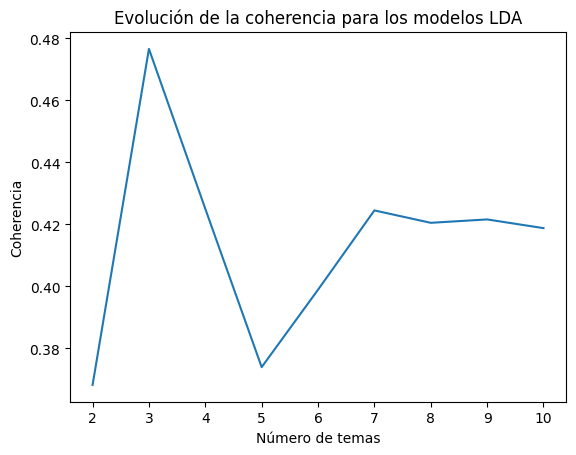

In [62]:
# Visualizar la evolución de la coherencia para los modelos LDA
plt.plot(range(mintopics_lda, maxtopics_lda+1), coherencias_lda)
plt.xlabel('Número de temas')
plt.ylabel('Coherencia')
plt.title('Evolución de la coherencia para los modelos LDA')
plt.show()

Modelo LDA con 2 temas:
Coherencia: 0.3682445020533398


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


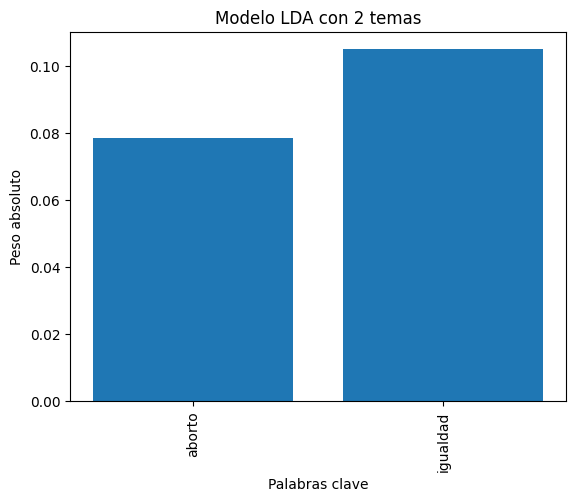



Modelo LDA con 3 temas:
Coherencia: 0.47662094637756675


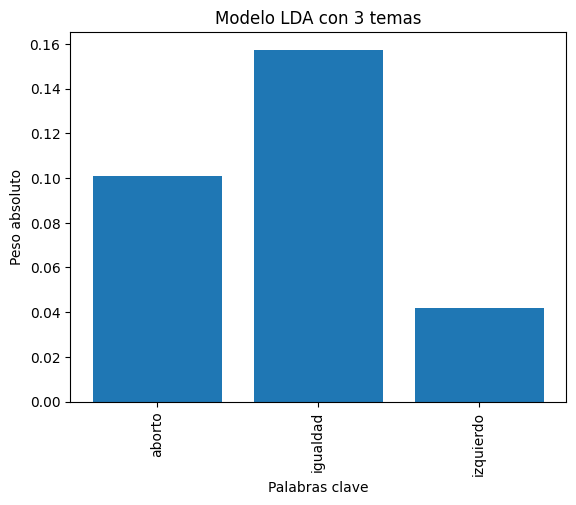



Modelo LDA con 4 temas:
Coherencia: 0.4250539685555704


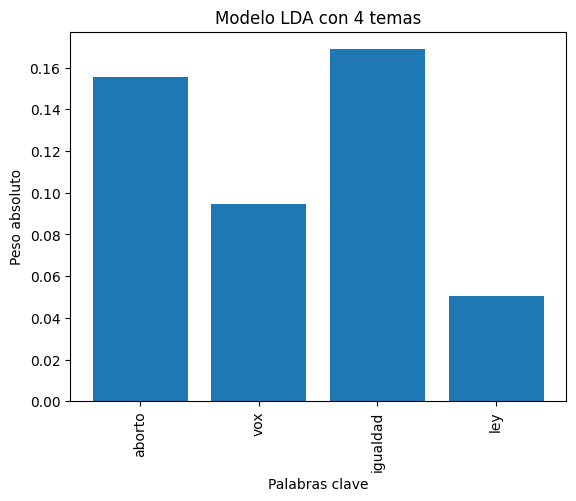



Modelo LDA con 5 temas:
Coherencia: 0.3739821427492983


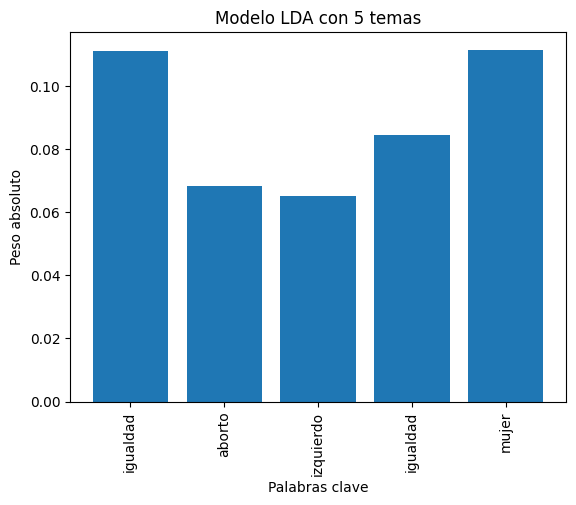



Modelo LDA con 6 temas:
Coherencia: 0.3989487479256261


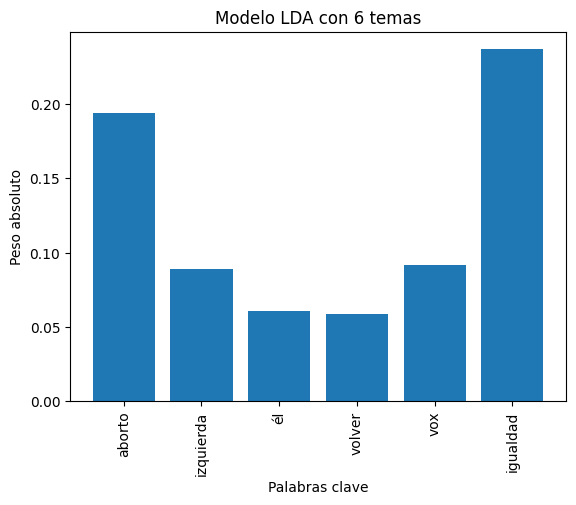



Modelo LDA con 7 temas:
Coherencia: 0.4245313136802271


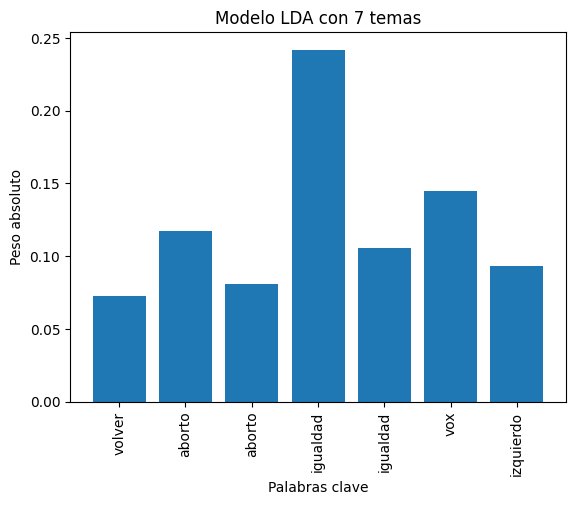



Modelo LDA con 8 temas:
Coherencia: 0.4205322785183057


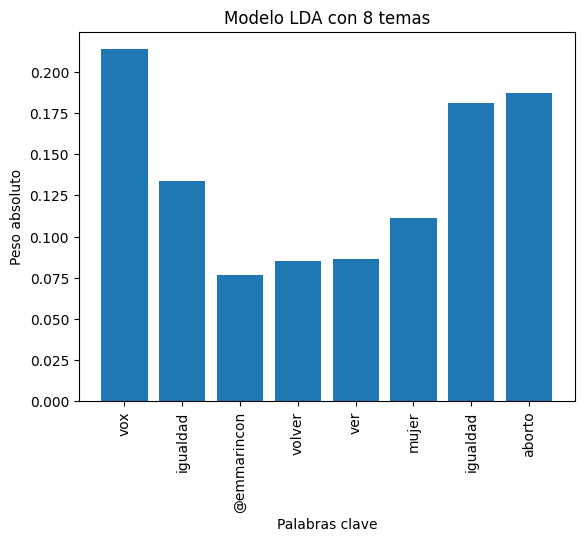



Modelo LDA con 9 temas:
Coherencia: 0.4216256215515467


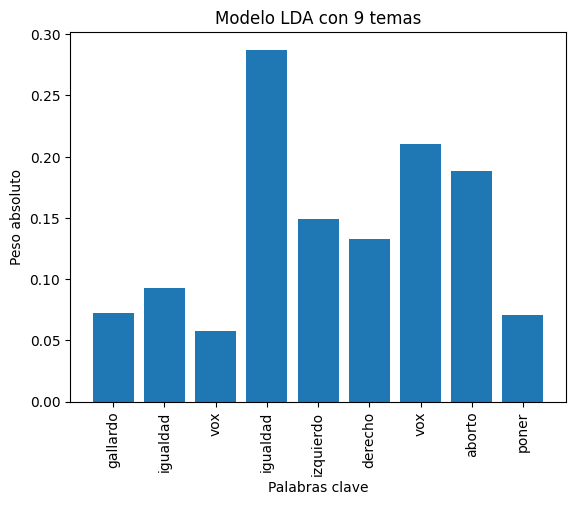



Modelo LDA con 10 temas:
Coherencia: 0.41881542553778306


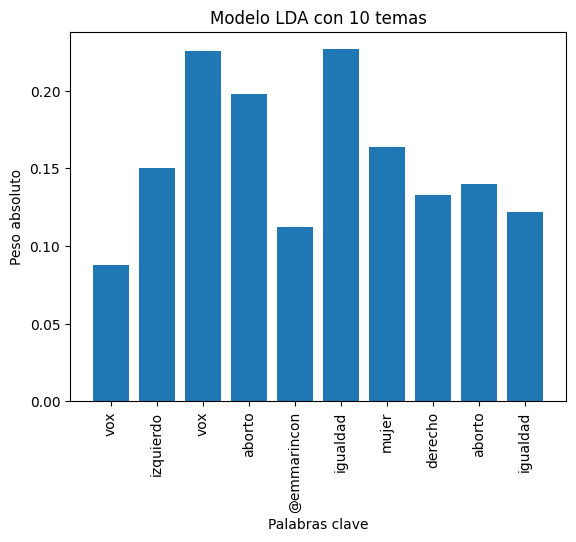

In [63]:
from itertools import zip_longest

# Imprimir coherencia y mostrar visualización para modelos LDA
for i, modelo_lda in enumerate(modelos_lda):
    print(f"Modelo LDA con {i+mintopics_lda} temas:")
    print(f"Coherencia: {coherencias_lda[i]}")
    topics = modelo_lda.show_topics(formatted=False)
    words = [[word for word, _ in topic[1]] for topic in topics]
    weights = [[weight for _, weight in topic[1]] for topic in topics]
    # Asegurar que las listas words y weights tengan la misma longitud
    max_len = max(len(words), len(weights))
    words = list(zip_longest(*words, fillvalue=''))
    weights = list(zip_longest(*weights, fillvalue=0.0))
    # Convertir los valores de los pesos a valores absolutos
    weights = [[abs(weight) for weight in topic_weights] for topic_weights in weights]
    fig, ax = plt.subplots()
    ax.bar(range(max_len), weights[0])  # Usar weights[0] en lugar de weights[i]
    ax.set_xticks(range(max_len))
    ax.set_xticklabels(words[0], rotation='vertical')  # Usar words[0] en lugar de words[i]
    plt.xlabel('Palabras clave')
    plt.ylabel('Peso absoluto')
    plt.title(f'Modelo LDA con {i+mintopics_lda} temas')
    plt.show()
    print("\n")



In [64]:
# Cargar el archivo CSV en un DataFrame
df_detalle_lda = pd.read_csv('/content/detalle_resultados_lda.csv')

# Luego, llamas a esta función para cada modelo, pasando el DataFrame adecuado y el nombre del modelo como argumento
generar_graficos_palabras_clave_por_subtopicos(df_detalle_lda, 'LDA')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


####LSI

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


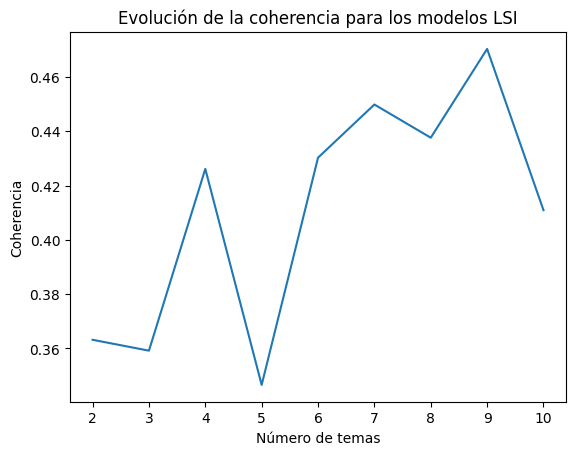

In [65]:
# Visualizar la evolución de la coherencia para los modelos LSI
plt.plot(range(mintopics_lsi, maxtopics_lsi+1), coherencias_lsi)
plt.xlabel('Número de temas')
plt.ylabel('Coherencia')
plt.title('Evolución de la coherencia para los modelos LSI')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Modelo LSI con 2 temas:
Coherencia: 0.36320451385414354


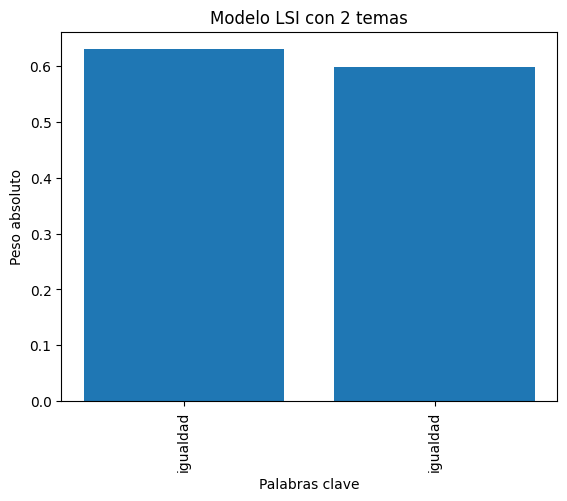



Modelo LSI con 3 temas:
Coherencia: 0.35919934531563363


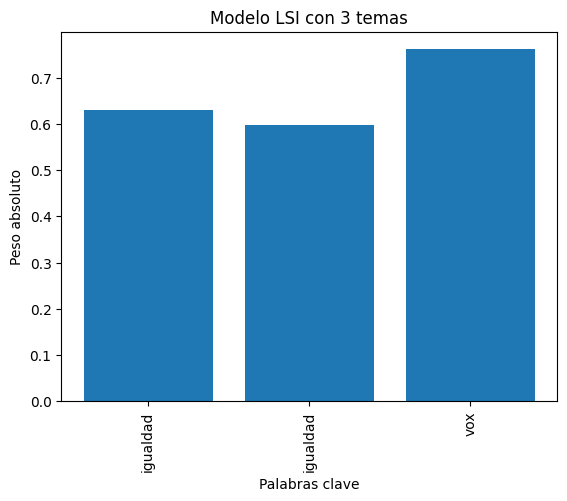



Modelo LSI con 4 temas:
Coherencia: 0.4261172800569597


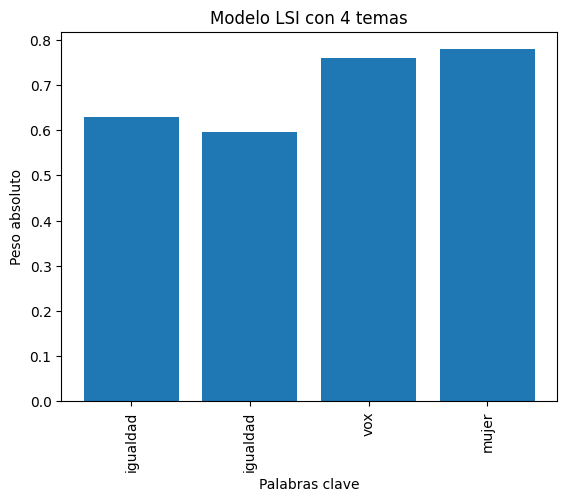



Modelo LSI con 5 temas:
Coherencia: 0.34658924059726337


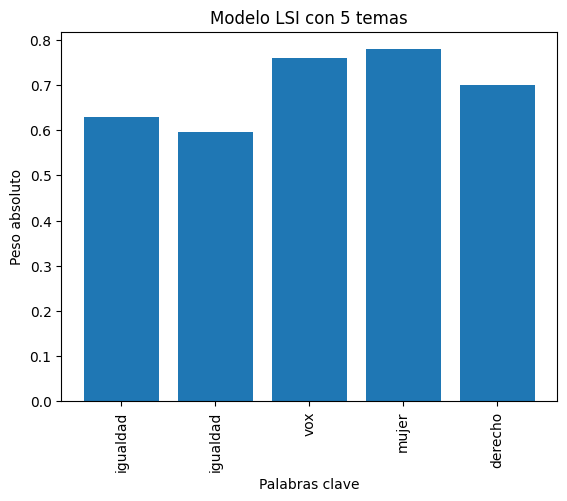



Modelo LSI con 6 temas:
Coherencia: 0.4302451677234769


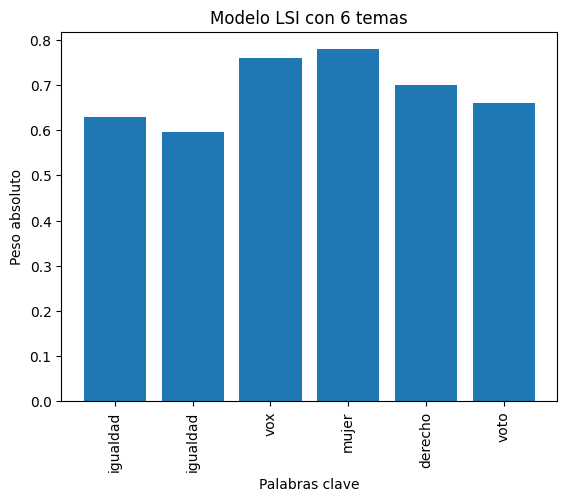



Modelo LSI con 7 temas:
Coherencia: 0.44981296722645253


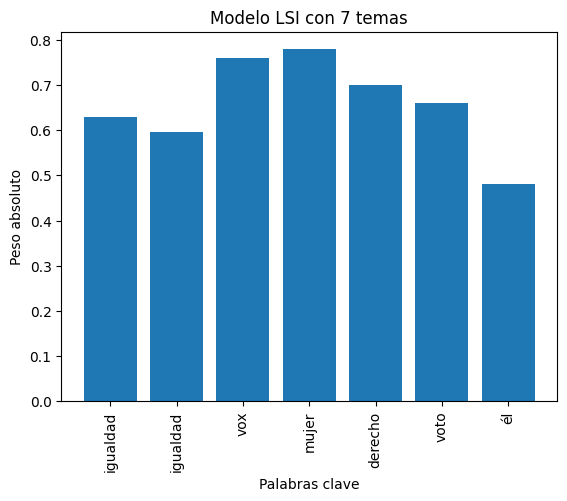



Modelo LSI con 8 temas:
Coherencia: 0.43759604873530367


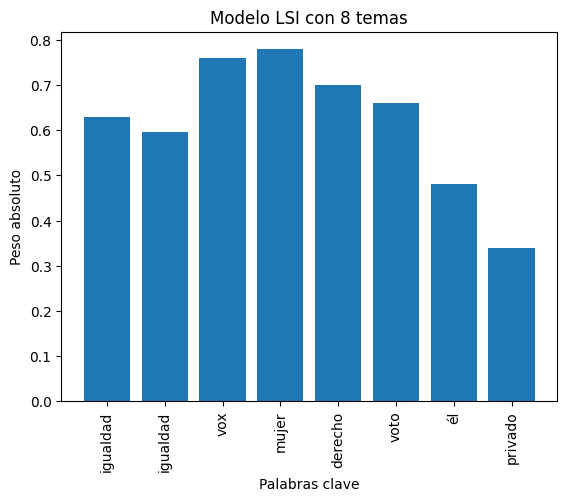



Modelo LSI con 9 temas:
Coherencia: 0.4702798946070403


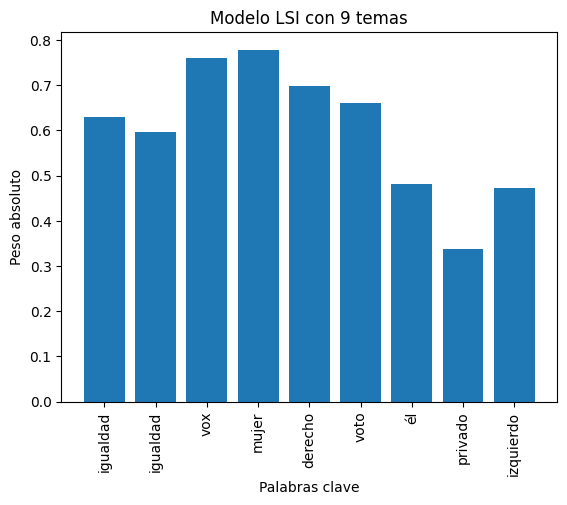



Modelo LSI con 10 temas:
Coherencia: 0.41092800944802


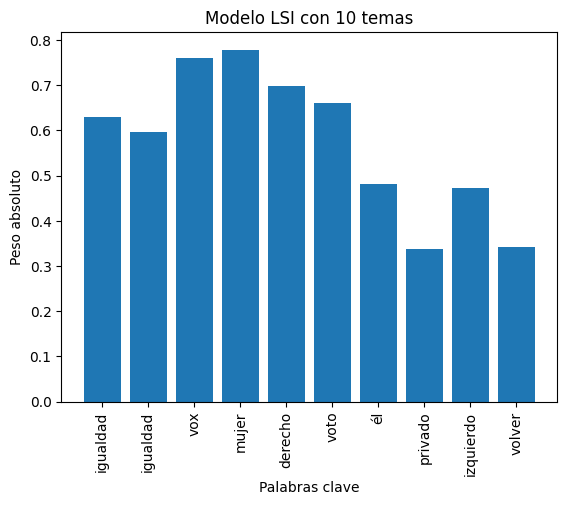

In [66]:
from itertools import zip_longest
from gensim.models import LsiModel

# Imprimir coherencia y mostrar visualización para modelos LSI
for i, modelo_lsi in enumerate(modelos_lsi):
    print(f"Modelo LSI con {i+mintopics_lsi} temas:")
    print(f"Coherencia: {coherencias_lsi[i]}")
    topics = modelo_lsi.show_topics(formatted=False)
    words = [[word for word, _ in topic[1]] for topic in topics]
    weights = [[weight for _, weight in topic[1]] for topic in topics]
    # Asegurar que las listas words y weights tengan la misma longitud
    max_len = max(len(words), len(weights))
    words = list(zip_longest(*words, fillvalue=''))
    weights = list(zip_longest(*weights, fillvalue=0.0))
    # Convertir los valores de los pesos a valores absolutos
    weights = [[abs(weight) for weight in topic_weights] for topic_weights in weights]
    fig, ax = plt.subplots()
    ax.bar(range(max_len), weights[0])  # Usar weights[0] en lugar de weights[i]
    ax.set_xticks(range(max_len))
    ax.set_xticklabels(words[0], rotation='vertical')  # Usar words[0] en lugar de words[i]
    plt.xlabel('Palabras clave')
    plt.ylabel('Peso absoluto')
    plt.title(f'Modelo LSI con {i+mintopics_lsi} temas')
    plt.show()
    print("\n")


In [67]:
# Cargar el archivo CSV en un DataFrame
df_detalle_lsi = pd.read_csv('/content/detalle_resultados_lsi.csv')

# Luego, llamas a esta función para cada modelo, pasando el DataFrame adecuado y el nombre del modelo como argumento
generar_graficos_palabras_clave_por_subtopicos(df_detalle_lsi, 'LSI')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


###comparaciones

In [68]:
import pandas as pd

# Cargar los datos de coherencia
df_coherencia_lda = pd.read_csv('/content/resultados_lda.csv')
df_coherencia_lsi = pd.read_csv('/content/resultados_lsi.csv')

# Cargar los datos de detalle de resultados
df_detalle_lda = pd.read_csv('/content/detalle_resultados_lda.csv')
df_detalle_lsi = pd.read_csv('/content/detalle_resultados_lsi.csv')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [104]:
from IPython.display import HTML

# Preparar datos de coherencia para el gráfico
num_temas_lda = df_coherencia_lda['Modelo'].str.extract('(\d+)').astype(int)
coherencias_lda = df_coherencia_lda['Coherencia']
num_temas_lsi = df_coherencia_lsi['Modelo'].str.extract('(\d+)').astype(int)
coherencias_lsi = df_coherencia_lsi['Coherencia']

# Crea el HTML con JavaScript para el gráfico de Chart.js
html_coherencias = f"""
<div style="width:600px; height:400px;">
  <canvas id="coherenciaChart"></canvas>
</div>
<script src="https://cdn.jsdelivr.net/npm/chart.js"></script>
<script>
  var ctx = document.getElementById('coherenciaChart').getContext('2d');
  var coherenciaChart = new Chart(ctx, {{
    type: 'line',
    data: {{
      labels: {list(num_temas_lda[0])},
      datasets: [
        {{
          label: 'LDA',
          data: {list(coherencias_lda)},
          borderColor: 'rgba(255, 99, 132, 1)',
          backgroundColor: 'rgba(255, 99, 132, 0.2)',
        }},
        {{
          label: 'LSI',
          data: {list(coherencias_lsi)},
          borderColor: 'rgba(54, 162, 235, 1)',
          backgroundColor: 'rgba(54, 162, 235, 0.2)',
        }}
      ]
    }},
    options: {{
      scales: {{
        y: {{
          beginAtZero: true
        }}
      }}
    }}
  }});
</script>
"""

# Muestra el gráfico en el notebook
HTML(html_coherencias)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<>:4: DeprecationWarning:

invalid escape sequence '\d'

<>:6: DeprecationWarning:

invalid escape sequence '\d'

<>:4: DeprecationWarning:

invalid escape sequence '\d'

<>:6: DeprecationWarning:

invalid escape sequence '\d'

<ipython-input-104-3b49421371f8>:4: DeprecationWarning:

invalid escape sequence '\d'

<ipython-input-104-3b49421371f8>:6: DeprecationWarning:

invalid escape sequence '\d'



##Algunas conclusiones
* Coherencia: La coherencia es una medida de calidad de los temas generados por el modelo LDA. Cuanto mayor sea el valor de coherencia, mejor será la interpretación y estructura de los temas. En este caso, se observa que a medida que aumenta el número de temas, la coherencia tiende a aumentar hasta cierto punto y luego disminuye. Esto sugiere que puede haber un número óptimo de temas para tu conjunto de datos.

* Número de temas: Al evaluar los modelos LDA con diferentes números de temas, es importante encontrar un equilibrio entre la calidad de los temas y la interpretación de los mismos. Si hay muy pocos temas, es posible que no capturen la diversidad y complejidad de los documentos. Por otro lado, si hay demasiados temas, es posible que se vuelvan redundantes o difíciles de interpretar. Es posible que el número óptimo de temas se encuentre en el rango donde la coherencia es más alta y los temas son interpretables.

* Interpretación de los temas: Además de la coherencia, es importante examinar los términos clave dentro de cada tema para evaluar la interpretabilidad de los mismos. Al revisar los términos más relevantes en cada tema, puedes obtener una idea de los conceptos o temas generales que se están discutiendo en tus documentos.

* Visualización: Aunque no pudimos generar los gráficos de PyLDAvis en este entorno y tuve que exportar el gráfico como un archivo HTML, la visualización de los modelos LDA es una herramienta útil para explorar y comprender mejor los temas generados. Los gráficos de burbujas, los paneles de términos y las distribuciones de términos y documentos pueden proporcionar una representación visual de los temas y sus relaciones.

En resumen, el análisis de los modelos LDA puede ayudarte a descubrir patrones, temas y relaciones ocultas en tus documentos. Al evaluar diferentes configuraciones de modelos y analizar los resultados, puedes obtener una mejor comprensión de tus datos y extraer información valiosa.

Para interpretar los resultados, puedes seguir estos pasos:

Observa las palabras clave en el eje x: Las etiquetas en el eje x corresponden a las palabras clave más relevantes asociadas a cada tema. Estas palabras pueden darte una idea general de qué trata cada tema.

Examina la altura de las barras: La altura de cada barra indica la importancia relativa del tema en el corpus. Cuanto más alta sea la barra, más dominante es ese tema en el corpus de texto.

Compara las barras: Puedes comparar las alturas de las barras para tener una idea de qué temas son más importantes o prominentes en comparación con otros. Las barras más altas representan los temas más relevantes en el corpus.

Observa la superposición o separación de las barras: Si las barras están muy separadas entre sí, indica que los temas son distintos y se pueden clasificar de manera más clara. Por otro lado, si las barras se superponen o están muy cercanas, puede indicar una mayor similitud entre los temas y una mayor dificultad para distinguirlos.

Recuerda que la interpretación de los resultados del modelo LSI es subjetiva y depende del contexto y los datos utilizados. Puedes utilizar estos resultados como una guía inicial para comprender los temas principales en tu corpus de texto y explorar más a fondo cada tema en función de las palabras clave y la importancia relativa.

##Guardar los resultados obtenidos

In [72]:
import csv

# Guardar resultados en archivo CSV
resultados_lda = []
for i, modelo_lda in enumerate(modelos_lda):
    resultado = {
        'Modelo': f"Modelo LDA con {i+mintopics_lda} temas",
        'Coherencia': coherencias_lda[i]
    }
    resultados_lda.append(resultado)

resultados_lsi = []
for i, modelo_lsi in enumerate(modelos_lsi):
    resultado = {
        'Modelo': f"Modelo LSI con {i+mintopics_lsi} temas",
        'Coherencia': coherencias_lsi[i]
    }
    resultados_lsi.append(resultado)

# Guardar resultados de LDA en CSV
nombre_archivo_lda = 'resultados_lda.csv'
with open(nombre_archivo_lda, 'w', newline='') as archivo:
    campos = ['Modelo', 'Coherencia']
    escritor = csv.DictWriter(archivo, fieldnames=campos)
    escritor.writeheader()
    escritor.writerows(resultados_lda)

# Guardar resultados de LSI en CSV
nombre_archivo_lsi = 'resultados_lsi.csv'
with open(nombre_archivo_lsi, 'w', newline='') as archivo:
    campos = ['Modelo', 'Coherencia']
    escritor = csv.DictWriter(archivo, fieldnames=campos)
    escritor.writeheader()
    escritor.writerows(resultados_lsi)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
import csv

def guardar_detalle_modelos_csv(modelos, coherencias, nombre_archivo, mintopics):
    with open(nombre_archivo, 'w', newline='', encoding='utf-8') as archivo:
        campos = ['Modelo', 'Coherencia', 'Número del Tema', 'Palabras Clave']
        escritor = csv.DictWriter(archivo, fieldnames=campos)
        escritor.writeheader()

        for i, (modelo, coherencia) in enumerate(zip(modelos, coherencias)):
            for tema_id, tema in modelo.show_topics(num_topics=-1, num_words=10, formatted=False):
                palabras_clave = ", ".join([f"{palabra} ({peso:.3f})" for palabra, peso in tema])
                escritor.writerow({
                    'Modelo': f"Modelo con {i + mintopics} temas",
                    'Coherencia': coherencia,
                    'Número del Tema': tema_id,
                    'Palabras Clave': palabras_clave
                })

# Guardar detalles de modelos LDA en CSV
guardar_detalle_modelos_csv(modelos_lda, coherencias_lda, 'detalle_resultados_lda.csv', mintopics_lda)

# Guardar detalles de modelos LSI en CSV
guardar_detalle_modelos_csv(modelos_lsi, coherencias_lsi, 'detalle_resultados_lsi.csv', mintopics_lsi)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Redes complejas

###Preparar archivo para Gephi
Gephi es una herramienta de visualización y exploración de grafos para todo tipo de redes y sistemas complejos, dinámicos e interconectados. Es de código abierto y permite a los usuarios interactuar con la representación gráfica de redes, manipular la estructura, forma y varios atributos de la red, y proporciona herramientas de análisis para identificar patrones, flujos o dinámicas dentro de la red.

En el contexto de Gephi, una red o grafo se compone de nodos (también llamados vértices) y aristas (también llamadas enlaces o bordes). Los nodos representan entidades o elementos individuales dentro de la red, mientras que las aristas representan las relaciones o conexiones entre esos nodos.
Tipos de Archivos:
Para trabajar con Gephi, a menudo necesitarás preparar y cargar dos tipos principales de archivos: nodos y aristas. Estos archivos definen la estructura de la red que quieres analizar y visualizar.

Archivo de Nodos:

Este archivo contiene información sobre los nodos en la red.
Cada fila representa un nodo único.
Los atributos comunes incluidos en el archivo de nodos pueden ser el ID del nodo (único para cada nodo), el nombre o etiqueta del nodo, y posiblemente otras características o métricas específicas del nodo, como el tamaño, color, o medidas de centralidad, dependiendo de lo que quieras analizar o visualizar.
Archivo de Aristas:

Este archivo describe las relaciones entre los nodos.
Cada fila en el archivo de aristas representa una conexión única entre dos nodos.
Los atributos comunes en este archivo incluyen el ID o nombre del nodo de origen, el ID o nombre del nodo de destino, y posiblemente el peso de la arista, que puede representar la fuerza o capacidad de la conexión, así como otros atributos específicos de la relación.

 Ambos tipos de archivos suelen estar en formatos que permiten representar datos tabulares, como CSV (Valores Separados por Comas).

####LDA

#####Nodos

In [74]:
def generar_nodos_lda_csv(modelos_lda, archivo_nodos_lda):
    nodos = set()
    for modelo in modelos_lda:
        for tema_id, tema in modelo.show_topics(num_topics=-1, num_words=10, formatted=False):
            nodos.add((f"Tema LDA {tema_id}", "Tema"))  # Añadir el tema como nodo
            for palabra, _ in tema:
                nodos.add((palabra, "Palabra clave"))  # Añadir palabras clave como nodos

    with open(archivo_nodos_lda, 'w', newline='', encoding='utf-8') as archivo:
        campos = ['Id', 'Label', 'Type']
        escritor = csv.DictWriter(archivo, fieldnames=campos)
        escritor.writeheader()
        for nodo, tipo in nodos:
            escritor.writerow({'Id': nodo, 'Label': nodo, 'Type': tipo})

generar_nodos_lda_csv(modelos_lda, 'nodos_lda.csv')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#####Aristas

In [75]:
def generar_aristas_lda_csv(modelos_lda, archivo_aristas_lda):
    aristas = []
    for modelo in modelos_lda:
        for tema_id, tema in modelo.show_topics(num_topics=-1, num_words=10, formatted=False):
            tema_label = f"Tema LDA {tema_id}"
            for palabra, peso in tema:
                aristas.append((tema_label, palabra, peso))

    with open(archivo_aristas_lda, 'w', newline='', encoding='utf-8') as archivo:
        campos = ['Source', 'Target', 'Weight']
        escritor = csv.DictWriter(archivo, fieldnames=campos)
        escritor.writeheader()
        for source, target, weight in aristas:
            escritor.writerow({'Source': source, 'Target': target, 'Weight': weight})

generar_aristas_lda_csv(modelos_lda, 'aristas_lda.csv')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


####LSI

#####Nodos

In [76]:
def generar_nodos_lsi_csv(modelos_lsi, archivo_nodos_lsi):
    nodos = set()
    for modelo in modelos_lsi:
        for tema_id, tema in modelo.show_topics(num_topics=-1, num_words=10, formatted=False):
            nodos.add((f"Tema LSI {tema_id}", "Tema"))  # Añadir el tema como nodo
            for palabra, _ in tema:
                nodos.add((palabra, "Palabra clave"))  # Añadir palabras clave como nodos

    with open(archivo_nodos_lsi, 'w', newline='', encoding='utf-8') as archivo:
        campos = ['Id', 'Label', 'Type']
        escritor = csv.DictWriter(archivo, fieldnames=campos)
        escritor.writeheader()
        for nodo, tipo in nodos:
            escritor.writerow({'Id': nodo, 'Label': nodo, 'Type': tipo})

generar_nodos_lsi_csv(modelos_lsi, 'nodos_lsi.csv')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#####Aristas

In [77]:
def generar_aristas_lsi_csv(modelos_lsi, archivo_aristas_lsi):
    aristas = []
    for modelo in modelos_lsi:
        for tema_id, tema in modelo.show_topics(num_topics=-1, num_words=10, formatted=False):
            tema_label = f"Tema LSI {tema_id}"
            for palabra, peso in tema:
                aristas.append((tema_label, palabra, peso))

    with open(archivo_aristas_lsi, 'w', newline='', encoding='utf-8') as archivo:
        campos = ['Source', 'Target', 'Weight']
        escritor = csv.DictWriter(archivo, fieldnames=campos)
        escritor.writeheader()
        for source, target, weight in aristas:
            escritor.writerow({'Source': source, 'Target': target, 'Weight': weight})

generar_aristas_lsi_csv(modelos_lsi, 'aristas_lsi.csv')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###Representación en el entorno
(NetworkX y Matplotlib o Plotly)



####LDA

#####NetworkX y Matplotlib

In [78]:
!pip install networkx


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


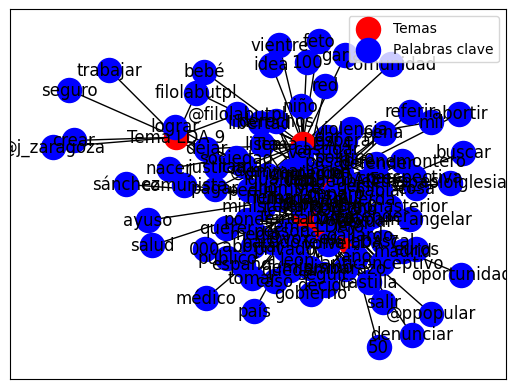

In [79]:
import networkx as nx
import matplotlib.pyplot as plt

def visualizar_red_lda(modelos_lda):
    G = nx.Graph()

    for modelo in modelos_lda:
        for tema_id, tema in modelo.show_topics(num_topics=-1, num_words=10, formatted=False):
            tema_label = f"Tema LDA {tema_id}"
            G.add_node(tema_label, type='Tema')
            for palabra, peso in tema:
                G.add_node(palabra, type='Palabra clave')
                G.add_edge(tema_label, palabra, weight=peso)

    pos = nx.spring_layout(G)  # Calcula la disposición de los nodos
    temas = [n for n, attr in G.nodes(data=True) if attr['type'] == 'Tema']
    palabras_clave = [n for n, attr in G.nodes(data=True) if attr['type'] == 'Palabra clave']

    # Dibujar nodos
    nx.draw_networkx_nodes(G, pos, nodelist=temas, node_color='red', label='Temas')
    nx.draw_networkx_nodes(G, pos, nodelist=palabras_clave, node_color='blue', label='Palabras clave')

    # Dibujar aristas
    nx.draw_networkx_edges(G, pos)

    # Dibujar etiquetas de nodos
    nx.draw_networkx_labels(G, pos)

    plt.legend(scatterpoints=1)
    plt.show()

# Llamar a la función de visualización
visualizar_red_lda(modelos_lda)


#####Plotly

In [87]:
!pip install plotly

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [91]:
import networkx as nx
import plotly.graph_objects as go
import plotly.io as pio

def visualizar_red_lda_plotly(modelos_lda):
    G = nx.Graph()

    # Construir la red
    for modelo in modelos_lda:
        for tema_id, tema in modelo.show_topics(num_topics=-1, num_words=10, formatted=False):
            tema_label = f"Tema LDA {tema_id}"
            G.add_node(tema_label, type='Tema')
            for palabra, peso in tema:
                G.add_node(palabra, type='Palabra clave')
                G.add_edge(tema_label, palabra, weight=peso)

    # Posiciones de los nodos
    pos = nx.spring_layout(G)

    # Nodos
    tema_nodos = [n for n, attr in G.nodes(data=True) if attr['type'] == 'Tema']
    palabra_nodos = [n for n, attr in G.nodes(data=True) if attr['type'] == 'Palabra clave']

    edge_x = []
    edge_y = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])

    edge_trace = go.Scatter(x=edge_x, y=edge_y, line=dict(width=0.5, color='#888'), hoverinfo='none', mode='lines')

    node_x = []
    node_y = []
    node_text = []
    node_color = []
    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        node_text.append(node)
        node_color.append('red' if node in tema_nodos else 'blue')

    node_trace = go.Scatter(x=node_x, y=node_y, mode='markers', hoverinfo='text', marker=dict(showscale=False, color=node_color, size=10), text=node_text)

    fig = go.Figure(data=[edge_trace, node_trace], layout=go.Layout(showlegend=False, hovermode='closest', margin=dict(b=0,l=0,r=0,t=0), xaxis=dict(showgrid=False, zeroline=False, showticklabels=False), yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))
    fig.show()
    return fig

# Llamar a la función de visualización con Plotly
fig = visualizar_red_lda_plotly(modelos_lda)

# Guardar el gráfico como un archivo HTML
pio.write_html(fig, "/content/redes_lda.html")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



####LSI

#####NetworkX y Matplotlib

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



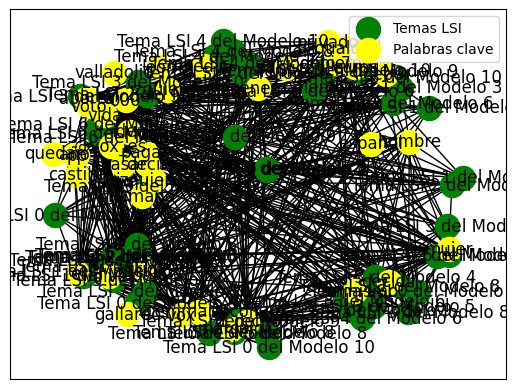

In [92]:
import networkx as nx
import matplotlib.pyplot as plt

def visualizar_red_lsi(modelos_lsi):
    G = nx.Graph()

    for i, modelo_lsi in enumerate(modelos_lsi):
        for tema_id, tema_info in enumerate(modelo_lsi.show_topics(num_topics=-1, num_words=10, formatted=False)):
            tema_label = f"Tema LSI {tema_id} del Modelo {i+mintopics_lsi}"
            G.add_node(tema_label, type='Tema')
            palabras_peso = tema_info[1]  # El segundo elemento es la lista de palabras y pesos
            for palabra, peso in palabras_peso:
                G.add_node(palabra, type='Palabra clave')
                G.add_edge(tema_label, palabra, weight=peso)

    pos = nx.spring_layout(G)  # Calcula la disposición de los nodos
    temas = [n for n, attr in G.nodes(data=True) if attr['type'] == 'Tema']
    palabras_clave = [n for n, attr in G.nodes(data=True) if attr['type'] == 'Palabra clave']

    # Dibujar nodos
    nx.draw_networkx_nodes(G, pos, nodelist=temas, node_color='green', label='Temas LSI')
    nx.draw_networkx_nodes(G, pos, nodelist=palabras_clave, node_color='yellow', label='Palabras clave')

    # Dibujar aristas
    nx.draw_networkx_edges(G, pos)

    # Dibujar etiquetas de nodos
    nx.draw_networkx_labels(G, pos)

    plt.legend(scatterpoints=1)
    plt.show()

# Suponiendo que `modelos_lsi` es tu lista de modelos LSI
visualizar_red_lsi(modelos_lsi)


#####Plotly

In [93]:
import networkx as nx
import plotly.graph_objects as go

def visualizar_red_lsi_plotly(modelos_lsi):
    G = nx.Graph()

    # Construir la red
    for i, modelo_lsi in enumerate(modelos_lsi):
        for tema_id, tema_info in enumerate(modelo_lsi.show_topics(num_topics=-1, num_words=10, formatted=False)):
            tema_label = f"Tema LSI {tema_id} del Modelo {i}"
            G.add_node(tema_label, type='Tema')
            palabras_peso = tema_info[1]  # El segundo elemento es la lista de palabras y pesos
            for palabra, peso in palabras_peso:
                G.add_node(palabra, type='Palabra clave')
                G.add_edge(tema_label, palabra, weight=peso)

    # Posiciones de los nodos
    pos = nx.spring_layout(G)

    # Nodos
    tema_nodos = [n for n, attr in G.nodes(data=True) if attr['type'] == 'Tema']
    palabra_nodos = [n for n, attr in G.nodes(data=True) if attr['type'] == 'Palabra clave']

    edge_x = []
    edge_y = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])

    edge_trace = go.Scatter(x=edge_x, y=edge_y, line=dict(width=0.5, color='#888'), hoverinfo='none', mode='lines')

    node_x = []
    node_y = []
    node_text = []
    node_color = []
    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        node_text.append(node)
        node_color.append('green' if node in tema_nodos else 'yellow')

    node_trace = go.Scatter(x=node_x, y=node_y, mode='markers', hoverinfo='text', marker=dict(showscale=False, color=node_color, size=10), text=node_text)

    fig = go.Figure(data=[edge_trace, node_trace], layout=go.Layout(showlegend=False, hovermode='closest', margin=dict(b=0,l=0,r=0,t=0), xaxis=dict(showgrid=False, zeroline=False, showticklabels=False), yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))
    fig.show()
    return fig

# Llamar a la función de visualización con Plotly
fig = visualizar_red_lsi_plotly(modelos_lsi)

# Guardar el gráfico como un archivo HTML
pio.write_html(fig, "/content/redes_lsi.html")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



#Modelo de hatespeech

##Paso 1: Crear y aplicar funciones de detección a los tuits


###Dirigido a personas

In [19]:
import re

def tweettargetedperson(tweet):
    # 0 no 1 sí dirigido a personas
    tweetlist = tweet.split()
    found = 0
    for word in tweetlist:
        if re.match(r"^@\w+", word):
            found = 1
    return found

#En esta versión de la función, se utiliza el patrón de expresión regular ^@\w+ para buscar un nombre de usuario de Twitter que comienza con "@". La expresión ^ indica el comienzo de la cadena, por lo que este patrón solo coincidirá con los tokens que comiencen con "@". Si se encuentra un token que coincide con este patrón, se establece la variable found en 1 y se devuelve al final de la función.

###Dirigido a minorías

In [20]:
def tweettargetedgroup(tweet):
  #0 no, 1 sí dirigido a minorías
  hate=analyzer_hate.predict(tweet)
  hateoutput=hate.output
  if "targeted" in hateoutput:
    result=1
  elif "hateful" in hateoutput:
    result=1
  elif "aggressive" in hateoutput:
    result=1
  else:
    result=0
  return result

###Presencia de emoticonos

In [21]:
def emojis(tweet):
  total_emojis=0
  for character in tweet:
    if character in emoji.UNICODE_EMOJI['es']:
      total_emojis+=1
  try:
    relation=total_emojis/len(tweet.split())
  except ZeroDivisionError:
    relation=0.0
  return relation

###caracteres repetidos innecesariamente

In [22]:
import re

def detectar_caracteres_repetidos(texto):
    # Busca caracteres repetidos más de 2 veces
    if re.search(r'(.)\1{2,}', texto):
        return 1
    else:
        return 0


###números y caracteres especiales
A este tipo de escritura se la denomina como Leet.e esta forma, cuando vemos una palabra como M4T3R14L inmediatamente se activa el significado de MATERIAL.
https://www.xataka.com/magnet/poder-leer-p4l4br4s-con-num3r05-no-es-tan-dificil-como-creias-todo-esta-en-tu-cerebro
https://www.agenciasinc.es/Alertas/Las-sustituciones-de-letra-por-numero-tienen-un-mayor-coste-de-lectura-que-las-de-letra-por-simbolo

In [23]:
import re
from nltk.tokenize import TweetTokenizer

# Inicializar el Tokenizer de NLTK para tuits
tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True, preserve_case=False)

# Patrones de sustitución específicos y sus correspondientes letras
sustituciones = {
    '0': 'o',
    '3': 'e',
    '1': 'i',
    '4': 'a',
    '5': 's',
    # '\*' tratado de manera especial más adelante
}

# Patrón para detectar y eliminar URLs
patron_url = re.compile(r'https?://\S+|www\.\S+')

def detectar_sustituciones(texto):
    # Eliminar URLs
    texto_sin_urls = re.sub(patron_url, '', texto)

    # Tokenizar el texto, ignorando menciones
    tokens = tokenizer.tokenize(texto_sin_urls)
    texto_modificado = ' '.join(tokens)

    # Inicializar bandera de realización de sustituciones
    realizo_sustituciones = False

    # Comprobar si hay sustituciones en el texto
    for buscar, reemplazar in sustituciones.items():
        # Modificar el patrón de búsqueda para incluir el contexto de la palabra
        patron_busqueda = re.compile(r'(?<=\W)' + re.escape(buscar) + r'(?=\W)|' + re.escape(buscar) + r'(?=\W)|(?<=\W)' + re.escape(buscar))
        if patron_busqueda.search(texto_modificado):
            realizo_sustituciones = True
            # No necesitamos reemplazar realmente, solo detectar
            break

    # Manejar el caso del asterisco de manera separada
    if not realizo_sustituciones:  # Solo buscar asteriscos si aún no se han encontrado sustituciones
        if re.search(r'\*', texto_modificado):
            realizo_sustituciones = True

    return 1 if realizo_sustituciones else 0
"""
# Ejemplos de uso
texto_ejemplo1 = "Este es un ejemplo c0ñ0."
texto_ejemplo2 = "Otro ejemplo sería mierd*."
texto_ejemplo3 = "Y no olvidemos put4."
texto_ejemplo4 = "El año 2022 fue interesante."
texto_ejemplo5 = "Reunión a las 6)."
texto_ejemplo6 = "6) El Ministerio de Irene Montero convocó a la asociación que preside esta señora a una reunión en el Congreso de los Diputados en 2022, junto a otras asociaciones feministas. https://t.co/9hwEGMggZD"

print(f"Resultado 1: {detectar_sustituciones(texto_ejemplo1)}")  # Esperamos 1
print(f"Resultado 2: {detectar_sustituciones(texto_ejemplo2)}")  # Esperamos 1
print(f"Resultado 3: {detectar_sustituciones(texto_ejemplo3)}")  # Esperamos 1
print(f"Resultado 4: {detectar_sustituciones(texto_ejemplo4)}")  # Esperamos 0
print(f"Resultado 5: {detectar_sustituciones(texto_ejemplo5)}")  # Esperamos 0
print(f"Resultado 6: {detectar_sustituciones(texto_ejemplo6)}")  # Esperamos 0
"""

'\n# Ejemplos de uso\ntexto_ejemplo1 = "Este es un ejemplo c0ñ0."\ntexto_ejemplo2 = "Otro ejemplo sería mierd*."\ntexto_ejemplo3 = "Y no olvidemos put4."\ntexto_ejemplo4 = "El año 2022 fue interesante."\ntexto_ejemplo5 = "Reunión a las 6)."\ntexto_ejemplo6 = "6) El Ministerio de Irene Montero convocó a la asociación que preside esta señora a una reunión en el Congreso de los Diputados en 2022, junto a otras asociaciones feministas. https://t.co/9hwEGMggZD"\n\nprint(f"Resultado 1: {detectar_sustituciones(texto_ejemplo1)}")  # Esperamos 1\nprint(f"Resultado 2: {detectar_sustituciones(texto_ejemplo2)}")  # Esperamos 1\nprint(f"Resultado 3: {detectar_sustituciones(texto_ejemplo3)}")  # Esperamos 1\nprint(f"Resultado 4: {detectar_sustituciones(texto_ejemplo4)}")  # Esperamos 0\nprint(f"Resultado 5: {detectar_sustituciones(texto_ejemplo5)}")  # Esperamos 0\nprint(f"Resultado 6: {detectar_sustituciones(texto_ejemplo6)}")  # Esperamos 0\n'

###separación de letras

In [24]:
def detectar_separacion_letras(texto):
    # Busca letras de palabras separadas por espacios innecesariamente
      if re.search(r'\b(\w\s+){2,}\w\b', texto):
        return 1
      else:
        return 0

###Discurso de odio

> [spanlp](https://pypi.org/project/spanlp/) es una biblioteca de Python diseñada para detectar, censurar y limpiar groserías, vulgaridades, palabras de odio, racismo, xenofobia y bullying en textos escritos en español.
Cubre palabras de más de 20 países de habla hispana, incluyendo Argentina, Bolivia, Chile, Colombia, España, México, y muchos más


> Casos de Uso:

*   Censurar vulgaridades en texto.
*   Detectar y censurar vulgaridades en salas de chat en línea.
*   Encontrar y censurar frases y palabras de odio, racismo, xenofobia, bullying.
*   Censurar comentarios groseros o insultos en blogs, aplicaciones web o sitios web.
*   Limpiar textos antes de ser publicados.
*   Detectar y eliminar vulgaridades en textos para niños.
*   Limpiar bases de datos con mucho texto.


Modificar o normalizar el texto antes de pasarlo a spanlp o cualquier otra herramienta de detección podría ser la mejor estrategia. Esto se debe a que:

* Maximizas la capacidad de detección de la herramienta al reducir las variaciones en cómo se pueden presentar las palabras ofensivas o el discurso de odio.
* Simplificas el texto para adaptarlo a lo que la herramienta puede procesar más efectivamente.

Para la implementación, se combinan las funciones de normalización en una función de preprocesamiento para aplicarla antes de pasar spanlp.

 Las funciones de detección ahora devolverán texto modificado o el original

In [25]:
emoticonos_a_palabras = {
    ":)": "feliz",
    ":D": "muy feliz",
    "XD": "risa",
    ":(": "triste",
    ":'(": "llorando",
    ":P": "burla",
    ";)": "guiño",
    ">:(": "enojado",
    "😂": "risa",
    "😢": "llorando",
    "😡": "enojado",
    "🤮": "asco",
    "💩": "caca",
    "😍": "enamorado",
    "🥺": "rogando",
    "😱": "sorprendido",
    "👿": "diablo",
    "🤡": "payaso",
    "👍": "aprobación",
    "👎": "desaprobación",
    "🙏": "rogando",
    "💔": "corazón roto",
    "❤️": "amor",
    "😴": "sueño",
    "🤔": "pensativo",
    "🎉": "celebración",
    "🤖": "robot",
    "👻": "fantasma",
    "💤": "sueño",
    "🔥": "fuego",
    # Añade más mapeos según sea necesario
}
def sustituir_emoticonos(texto):
    for emoticono, palabra in emoticonos_a_palabras.items():
        texto = texto.replace(emoticono, palabra)
    return texto

In [26]:
def modificar_caracteres_repetidos(texto):
    if re.search(r'(.)\1{2,}', texto):
        texto = re.sub(r'(.)\1{2,}', r'\1', texto)  # Reduce repetición excesiva
    return texto

In [27]:
def modificar_separacion_letras(texto):
    texto = re.sub(r'\b(\w\s+){2,}\w\b', '', texto)  # Cierra espacios innecesarios
    return texto

In [28]:
import re
from nltk.tokenize import TweetTokenizer

# Inicializar el Tokenizer de NLTK para tuits
tokenizer = TweetTokenizer(preserve_case=True)

# Mapeo de sustituciones comunes usados en Leet
sustituciones_leet = {
    '4': 'a',
    '3': 'e',
    '1': 'i',
    '0': 'o',
    '7': 't',
    '5': 's',
    # Añade o ajusta según sea necesario
}

def modificar_numeros_caracteres_especiales(texto):
    # Tokenizar el texto para separar palabras, menciones y URLs
    tokens = tokenizer.tokenize(texto)

    texto_modificado = []

    for token in tokens:
        # Verificar si el token es una mención o URL y dejarlo sin cambios
        if token.startswith('@') or token.startswith('http'):
            texto_modificado.append(token)
        else:
            # Aplicar sustituciones leet
            for num, letra in sustituciones_leet.items():
                token = token.replace(num, letra)
            # Sustituir asteriscos por 'a'
            token = token.replace('*', 'a')
            # Eliminar otros caracteres especiales no manejados específicamente
            token = re.sub(r'[@#$%^&*()_+=]', '', token)
            texto_modificado.append(token)

    return ' '.join(texto_modificado)


In [29]:
# Ejemplos de texto para aplicar la función
ejemplo1 = "3st4 es un4 pru3b4 d3 t3xt0 L33t."
ejemplo2 = "C0ns1d3r4 est* c*mo un t3st d3 c3nsur4."
ejemplo3 = "L4 v1d4 es b3ll4 c0n 4m*g*s y 3strell4s."

# Aplicando la función a los ejemplos
texto_modificado1 = modificar_numeros_caracteres_especiales(ejemplo1)
texto_modificado2 = modificar_numeros_caracteres_especiales(ejemplo2)
texto_modificado3 = modificar_numeros_caracteres_especiales(ejemplo3)

# Imprimir resultados
print("Texto original 1:", ejemplo1)
print("Texto modificado 1:", texto_modificado1)
print("\nTexto original 2:", ejemplo2)
print("Texto modificado 2:", texto_modificado2)
print("\nTexto original 3:", ejemplo3)
print("Texto modificado 3:", texto_modificado3)

Texto original 1: 3st4 es un4 pru3b4 d3 t3xt0 L33t.
Texto modificado 1: esta es una pru eba de texto Leet .

Texto original 2: C0ns1d3r4 est* c*mo un t3st d3 c3nsur4.
Texto modificado 2: Considera est a c a mo un test de censura .

Texto original 3: L4 v1d4 es b3ll4 c0n 4m*g*s y 3strell4s.
Texto modificado 3: La vida es bella con am a g a s y estrellas .


In [30]:
def preprocesar_texto(texto):
    texto = sustituir_emoticonos(texto)  # Sustituye emoticonos
    texto = modificar_caracteres_repetidos(texto)
    texto = modificar_numeros_caracteres_especiales(texto)  # maneja números y asteriscos
    texto = modificar_separacion_letras(texto)
    return texto


In [31]:
from spanlp.palabrota import Palabrota

def detectar_discurso_odio_con_preprocesamiento(frase):
    frase_preprocesada = preprocesar_texto(frase)
    palabrota = Palabrota()
    contiene_palabrota = palabrota.contains_palabrota(frase_preprocesada)

    # Devuelve 1 si se detecta discurso de odio, de lo contrario 0
    return 1 if contiene_palabrota else 0

###Discurso de odio II
Esta biblioteca finalmente no será implementada en el modelo porque

*   spanlp se especializa en identificar y manejar lenguaje ofensivo en español, incluyendo groserías, palabras de odio, racismo, xenofobia y bullying. Esta especialización permite un enfoque más afinado en el tratamiento de contenido sensible, resultando en una detección más precisa y efectiva.
*   Al contar con un conjunto de datos que incluye expresiones ofensivas de más de 20 países hispanohablantes, spanlp puede ofrecer un rendimiento superior al identificar y procesar variaciones dialectales específicas, lo que reduce la probabilidad de falsos negativos y positivos durante el preprocesamiento.
* Dado que spanlp ha demostrado producir menos errores en el entrenamiento relacionados con el preprocesamiento, indica que sus métodos de limpieza y tratamiento de texto están bien optimizados para las peculiaridades del lenguaje español. Esto es crucial para aplicaciones donde la precisión en la detección y manejo de contenido ofensivo es primordial.




In [32]:
!pip install spanish_nlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 29.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.5/659.5 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 3.1 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16506 sha256=cd5acd697e5129a8bafa8e49d0445bd72440b9a00d0a453ee624efe5ee867070
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.2
    Uninstalling wasabi-1.1.2:
   

In [33]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 2.1 MB/s eta 0:00:00


In [34]:
from spanish_nlp import preprocess, classifiers

def detectar_discurso_odio_mejorado(texto):
    # Aplicar preprocesamiento personalizado primero
    texto = preprocesar_texto(texto)
    # Inicializar el módulo de preprocesamiento con ajustes adicionales
    sp = preprocess.SpanishPreprocess(
        lower=True,
        remove_url=True,
        remove_hashtags=True,  # Eliminar hashtags
        split_hashtags=False,
        normalize_breaklines=True,
        remove_emoticons=False,
        remove_emojis=False,
        convert_emoticons=True,  # Convertir emoticonos a texto
        convert_emojis=True,  # Convertir emojis a texto
        normalize_inclusive_language=True,
        reduce_spam=True,
        remove_vowels_accents=True,
        remove_multiple_spaces=True,
        remove_punctuation=True,
        remove_unprintable=True,
        remove_numbers=False,  # Conservar números para detectar manipulaciones como "c0ñ0"
        remove_stopwords=False,
        stopwords_list=None,
        lemmatize=False,
        stem=False,
        remove_html_tags=True,
    )

    # Preprocesar el texto con SpanishPreprocess
    texto_preprocesado = sp.transform(texto, debug=False)

    # Inicializar el clasificador de discurso de odio
    sc = classifiers.SpanishClassifier(model_name="hate_speech", device='cpu')

    # Realizar la clasificación
    predicciones = sc.predict(texto_preprocesado)
    # Devolver el valor asociado a la clave 'hate' de las predicciones
    valor_hate = predicciones.get('hate', 0)
    return valor_hate
    """
    # Devolver 1 si hay algún nivel de discurso de odio detectado (umbral), de lo contrario 0
    valor_hate = predicciones.get('hate', 0)
    return 1 if valor_hate > 0.1 else 0  #0.1 es el umbral, que puede ser modificable


# Ejemplo de uso
texto = "me cago en tu put4 m*adre"
texto1 = 'los gays deberían ser extermin*d0s'
resultado_hate = detectar_discurso_odio_mejorado(texto)
resultado_hate1 = detectar_discurso_odio_mejorado(texto1)
print(f"Hate: {resultado_hate:.4f}")  # Imprimirá el valor de la probabilidad de 'hate'
print(f"Hate: {resultado_hate1:.4f}")  # Imprimirá el valor de la probabilidad de 'hate'
    """


/usr/local/lib/python3.10/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'es_core_news_sm' (3.1.0) was trained with spaCy v3.1.0 and may not be 100% compatible with the current version (3.7.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  directory, to prevent mismatches with relative paths.


###abreviaturas

In [35]:
def detectar_abreviaturas_insultos(texto):
    # Lista corregida y simplificada de abreviaturas de insultos conocidos
    abreviaturas_insultos = [
        'hdp',  # hijo de puta
        'hp',  # hijo de puta
        'ctm',  # concha tu madre
        'ptm',  # puta tu madre
        'lpqtp',  # la puta que te parió
        'nmms',  # no mames
        'jdp',  # jodido pendejo
        'atpc',  # a tomar por culo
        'mier', #mierda
        # Añade más abreviaturas según sea necesario
    ]

    texto_normalizado = texto.lower()

    # Verifica si alguna abreviatura de insulto se encuentra en el texto
    for abreviatura in abreviaturas_insultos:
        if abreviatura in texto_normalizado:
            return 1  # Devuelve 1 si se encuentra alguna abreviatura de insulto

    return 0  # Devuelve 0 si no se encuentra ninguna abreviatura de insulto



###mayúsculas = gritar

In [36]:
def shout(tweet):
  lower=0
  capital=0
  for letter in tweet:
    if letter.islower():
      lower+=1
    elif letter.isupper():
      capital+=1
  total=lower+capital
  try:
    relation=capital/total
  except ZeroDivisionError:
    relation=0.0
  return relation


## Paso 2: Carga el archivo con los tuits seleccionados y aplicar las funciones

In [ ]:
import pandas as pd
import numpy as np

# Cargar el archivo CSV
df = pd.read_csv('/content/tweetsoriginales.csv', header=None)

#Añadir el encabezado 'Tweet' a la primera columna
df.columns = ['Tweet']

#Guardar el DataFrame con el nuevo encabezado de vuelta a un archivo CSV
df.to_csv('/content/tweetsoriginales.csv', index=False)

# Seleccionar aleatoriamente 300 tuits
df_seleccionados = df.sample(n=300, random_state=1) # Usar random_state para reproducibilidad

# Aplicar las funciones solo a los tuits seleccionados
df_seleccionados['Dirigido a personas'] = df_seleccionados['Tweet'].apply(tweettargetedperson)
df_seleccionados['Dirigido a minorías'] = df_seleccionados['Tweet'].apply(tweettargetedgroup)
df_seleccionados['Emoticonos'] = df_seleccionados['Tweet'].apply(emojis)
df_seleccionados['Caracteres repetidos'] = df_seleccionados['Tweet'].apply(detectar_caracteres_repetidos)
df_seleccionados['Números y caracteres especiales'] = df_seleccionados['Tweet'].apply(detectar_sustituciones)
df_seleccionados['Separación de letras'] = df_seleccionados['Tweet'].apply(detectar_separacion_letras)
df_seleccionados['Abreviaturas de insultos'] = df_seleccionados['Tweet'].apply(detectar_abreviaturas_insultos)
df_seleccionados['Mayúsculas'] = df_seleccionados['Tweet'].apply(shout)
df_seleccionados['Discurso de odio'] = df_seleccionados['Tweet'].apply(detectar_discurso_odio_con_preprocesamiento)


# Añadir la nueva columna "Algolingua" con valores nulos como marcador de posición
df_seleccionados['Algolingua'] = None

# Guardar los tuits seleccionados a un archivo Excel
df_seleccionados.to_excel('choicetweets_algolingua1.xlsx', index=False)

# Identificar los tuits no seleccionados
df_no_seleccionados = df.drop(df_seleccionados.index)

# Guardar los tuits no seleccionados a otro archivo Excel
df_no_seleccionados.to_excel('NOTchoicedtweets_algolingua1.xlsx', index=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Paso 3: Entrenamiento de regresión logística (70%) y evaluación (30%)

Precisión del modelo: 0.7333333333333333


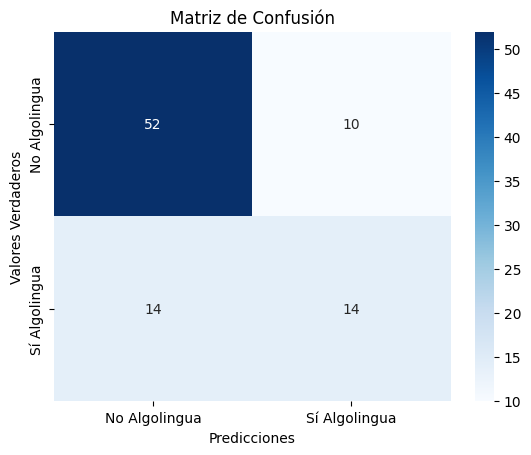

Matriz de confusión:
[[52 10]
 [14 14]]
Verdaderos Negativos (VN): 52
Falsos Positivos (FP): 10
Falsos Negativos (FN): 14
Verdaderos Positivos (VP): 14


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo Excel, asumiendo que 'Algolingua' ya está correctamente categorizada
df = pd.read_excel('targeted_choicetweets_algolingua.xlsx')

# Suponiendo que la primera columna es 'Tweet' y no se usará como variable independiente
X = df.drop(['Tweet', 'Algolingua'], axis=1)  # Asegúrate de excluir correctamente la columna 'Tweet'
y = df['Algolingua']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train, y_train)

# Predecir los valores para el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular y mostrar la precisión del modelo
print("Precisión del modelo:", accuracy_score(y_test, y_pred))

# Generar y visualizar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Algolingua', 'Sí Algolingua'], yticklabels=['No Algolingua', 'Sí Algolingua'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')
plt.show()
# Imprimir los valores de la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Imprimir los valores descriptivos de la matriz de confusión
verdaderos_negativos, falsos_positivos, falsos_negativos, verdaderos_positivos = conf_matrix.ravel()
print(f'Verdaderos Negativos (VN): {verdaderos_negativos}')
print(f'Falsos Positivos (FP): {falsos_positivos}')
print(f'Falsos Negativos (FN): {falsos_negativos}')
print(f'Verdaderos Positivos (VP): {verdaderos_positivos}')

####conclusión

In [50]:
from joblib import dump

# Guardar el modelo entrenado en un archivo
dump(model, 'logistic_regression_model.joblib')


['logistic_regression_model.joblib']

In [51]:
def calcular_metricas_modelo(conf_matrix):
    """
    Calcula las métricas de precisión, recall, especificidad, F1-score
    a partir de la matriz de confusión.
    """
    VN, FP, FN, VP = conf_matrix.ravel()

    precision = VP / (VP + FP) if (VP + FP) != 0 else 0
    recall = VP / (VP + FN) if (VP + FN) != 0 else 0
    especificidad = VN / (VN + FP) if (VN + FP) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    return precision, recall, especificidad, f1_score
# Asumiendo que 'conf_matrix' es la matriz de confusión obtenida del modelo
precision, recall, especificidad, f1_score = calcular_metricas_modelo(conf_matrix)

print(f'Precisión: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1-score: {f1_score}')


Precisión: 0.5833333333333334
Recall: 0.5
Especificidad: 0.8387096774193549
F1-score: 0.5384615384615384




##Paso 4: Aplicar, las funciones y el modelo a todos los tuits y exportar resultados


In [55]:
import pandas as pd
from joblib import load
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los tweets ya procesados y con la columna Algolingua
df_choice = pd.read_excel('targeted_choicetweets_algolingua.xlsx')

# Cargar los nuevos tweets a clasificar y procesarlos
df_notchoice = pd.read_excel('/content/NOTchoicedtweets_algolingua.xlsx')
# Aquí deberías definir las funciones usadas como tweettargetedperson, tweettargetedgroup, etc.
df_notchoice['Dirigido a personas'] = df_notchoice['Tweet'].apply(tweettargetedperson)
df_notchoice['Dirigido a minorías'] = df_notchoice['Tweet'].apply(tweettargetedgroup)
df_notchoice['Emoticonos'] = df_notchoice['Tweet'].apply(emojis)
df_notchoice['Caracteres repetidos'] = df_notchoice['Tweet'].apply(detectar_caracteres_repetidos)
df_notchoice['Números y caracteres especiales'] = df_notchoice['Tweet'].apply(detectar_sustituciones)
df_notchoice['Separación de letras'] = df_notchoice['Tweet'].apply(detectar_separacion_letras)
df_notchoice['Abreviaturas de insultos'] = df_notchoice['Tweet'].apply(detectar_abreviaturas_insultos)
df_notchoice['Mayúsculas'] = df_notchoice['Tweet'].apply(shout)
df_notchoice['Discurso de odio'] = df_notchoice['Tweet'].apply(detectar_discurso_odio_con_preprocesamiento)

# Concatenar ambos DataFrames
df_combined = pd.concat([df_choice, df_notchoice], ignore_index=True)

# Cargar el modelo entrenado
model = load('/content/logistic_regression_model.joblib')

# Preparar las características excluyendo la columna 'Tweet'
X_combined = df_combined.drop(['Tweet', 'Algolingua'], axis=1)

# Imputar valores faltantes con la mediana
imputer = SimpleImputer(strategy='median')

# Asumiendo que X_combined ya está definido y contiene valores NaN
X_combined_imputed = imputer.fit_transform(X_combined)

# Realizar predicciones con el modelo usando los datos imputados
predictions_combined = model.predict(X_combined_imputed)

# Actualizar el DataFrame original con las predicciones
df_combined['Algolingua'] = predictions_combined

# Guardar las predicciones en un nuevo archivo Excel
df_combined.to_excel('/content/algolingua_classified_combined.xlsx', index=False)

# Calcular y mostrar el porcentaje de tweets clasificados como 'Algolingua'
porcentaje_algolingua = (df_combined['Algolingua'].mean() * 100)
print(f"Porcentaje de tweets con 'Algolingua': {porcentaje_algolingua:.2f}%")

# Calcular el número de tuits clasificados como discurso de odio y no discurso de odio
conteo_algolingua = df_combined['Algolingua'].value_counts()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Porcentaje de tweets con 'Algolingua': 36.92%


In [107]:
from IPython.display import HTML

# Suponiendo que conteo_algolingua es un pandas.Series con índices [0, 1] y los valores son los conteos correspondientes.
# Calcula los porcentajes
porcentaje_sin = (conteo_algolingua[0] / conteo_algolingua.sum()) * 100
porcentaje_con = (conteo_algolingua[1] / conteo_algolingua.sum()) * 100

# Crea el HTML con JavaScript para el gráfico de Chart.js
html_str = f"""
<div style="width:400px; height:400px;">
  <canvas id="algolinguaChart"></canvas>
</div>
<script src="https://cdn.jsdelivr.net/npm/chart.js"></script>
<script>
  var ctx = document.getElementById('algolinguaChart').getContext('2d');
  var algolinguaChart = new Chart(ctx, {{
    type: 'bar',
    data: {{
      labels: ['Sin Discurso de Odio', 'Con Discurso de Odio'],
      datasets: [{{
        label: 'Porcentaje de Tweets',
        data: [{porcentaje_sin}, {porcentaje_con}],
        backgroundColor: [
          'rgba(255, 99, 132, 0.2)',
          'rgba(54, 162, 235, 0.2)'
        ],
        borderColor: [
          'rgba(255, 99, 132, 1)',
          'rgba(54, 162, 235, 1)'
        ],
        borderWidth: 1
      }}]
    }},
    options: {{
      scales: {{
        y: {{
          beginAtZero: true
        }}
      }}
    }}
  }});
</script>
"""

# Muestra el gráfico en el notebook
HTML(html_str)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


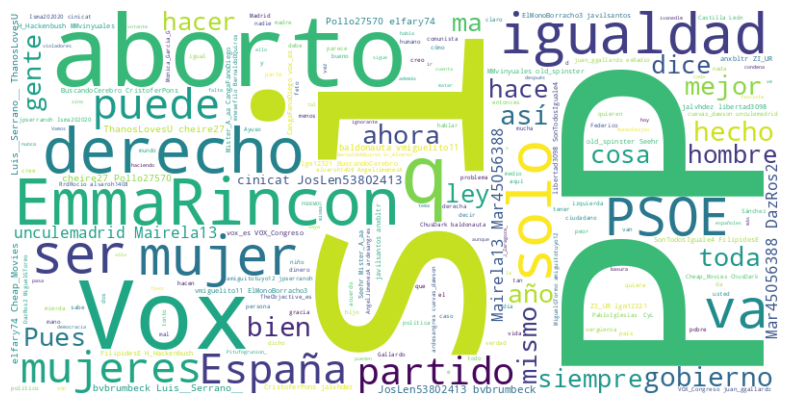

In [57]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
import re  # Importar la biblioteca de expresiones regulares

# Descargar la lista de stopwords en español de nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('spanish'))

# Cargar el DataFrame desde el archivo Excel
df_combined = pd.read_excel('/content/algolingua_classified_combined.xlsx')

# Filtrar los tuits clasificados como discurso de odio
tweets_discurso_odio = df_combined[df_combined['Algolingua'] == 1]['Tweet']

# Combinar todos los tuits en una única cadena de texto
texto_discurso_odio = " ".join(tuit for tuit in tweets_discurso_odio)

# Eliminar URLs del texto
texto_discurso_odio_sin_urls = re.sub(r'http\S+|www\S+|https\S+', '', texto_discurso_odio)

# Filtrar las stopwords del texto
texto_discurso_odio_sin_stopwords = " ".join(palabra for palabra in texto_discurso_odio_sin_urls.split() if palabra.lower() not in stop_words)

# Generar la nube de palabras sin stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_discurso_odio_sin_stopwords)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Colocaciones

In [100]:
!python -m spacy download es_core_news_sm


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



2024-02-16 12:36:28.830870: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-16 12:36:28.831047: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-16 12:36:28.837994: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-16 12:36:31.622508: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
DEPRECATION: https://github.com/explosion/spacy-models/releases/download/es_core_news_sm-3.1.0/es_core_news_sm-3.1.0-py3-none-any.whl#egg=es_core_news_sm==3.1.0 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this beha

In [101]:
import pandas as pd
import spacy
import re
from collections import Counter
from nltk.util import ngrams
from spacy.lang.es.stop_words import STOP_WORDS

# Carga el modelo de spaCy en español
nlp = spacy.load("es_core_news_sm")

# Función para limpiar el texto mínimamente (solo elimina URLs, hashtags, menciones y convierte a minúsculas)
def limpiar_texto_minimamente(texto):
    texto = re.sub(r'http\S+|www\S+|https\S+', '', texto, flags=re.MULTILINE)
    texto = re.sub(r'\@\w+|\#', '', texto)
    texto = texto.lower()
    return texto

# Función para limpiar el texto completamente (elimina caracteres especiales, números y stopwords)
def limpiar_texto_completamente(texto):
    texto = re.sub(r'\W+|\d+', ' ', texto)
    texto = ' '.join([palabra for palabra in texto.split() if palabra not in STOP_WORDS])
    return texto

# Función para extraer POS tags y bigramas del texto mínimamente limpio
abreviaturas = {
    "tb": "también",
    "k": "qué",
    "q": "qué",
    "d": "de"
}

def lematizar_y_colocaciones(texto):
    doc = nlp(texto)
    colocaciones = []
    pos_tags = []

    tokens_filtrados = []
    for token in doc:
        if not token.is_stop and not token.is_punct and not token.is_space and token.is_alpha:
            texto_token = token.text
            # Reemplazar abreviaturas usando el diccionario
            texto_token_extendido = abreviaturas.get(texto_token, texto_token)
            tokens_filtrados.append(texto_token_extendido)

    # Construir colocaciones solo con tokens filtrados
    for i in range(len(tokens_filtrados)-1):
        colocaciones.append((tokens_filtrados[i], tokens_filtrados[i+1]))
        pos_tags.append(doc[i].pos_)

    if tokens_filtrados:
        pos_tags.append(doc[-1].pos_)

    return colocaciones, pos_tags

# Carga el archivo CSV sin encabezado, asignando un nombre a la columna
df = pd.read_csv('/content/tweetsoriginales.csv', header=None, names=['Tweet'])

# Aplicar limpieza mínima y extracción de POS tags y bigramas
df['Tweet_min_limpio'] = df['Tweet'].apply(limpiar_texto_minimamente)
df['Resultado'] = df['Tweet_min_limpio'].apply(lematizar_y_colocaciones)
df['Colocaciones'] = df['Resultado'].apply(lambda x: x[0])
df['POS_tags'] = df['Resultado'].apply(lambda x: x[1])

# Aplicar limpieza completa después de extraer POS tags y bigramas
df['Tweet_limpio'] = df['Tweet_min_limpio'].apply(limpiar_texto_completamente)

# Cálculo de porcentajes de POS tags
todos_pos_tags = [pos for sublist in df['POS_tags'] for pos in sublist]
conteo_pos_tags = Counter(todos_pos_tags)
total_pos_tags = sum(conteo_pos_tags.values())
porcentajes_pos_tags = {pos: (count / total_pos_tags) * 100 for pos, count in conteo_pos_tags.items()}

print("Porcentajes de POS tags:", porcentajes_pos_tags)

# Preparar datos para Gephi
from collections import defaultdict

# Sumarizar colocaciones repetidas con su frecuencia como peso
colocaciones_con_peso = defaultdict(int)
for colocacion in df['Colocaciones'].explode():
    if pd.notna(colocacion):
        colocaciones_con_peso[colocacion] += 1

# Preparar los datos para Gephi
edges = []
for colocacion, peso in colocaciones_con_peso.items():
    edges.append({'Source': colocacion[0], 'Target': colocacion[1], 'Type': 'Undirected', 'Weight': peso})

edges_df = pd.DataFrame(edges)
edges_df.to_csv('/content/colocaciones_con_peso_para_gephi.csv', index=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/spacy/util.py:910: UserWarning:

[W095] Model 'es_core_news_sm' (3.1.0) was trained with spaCy v3.1.0 and may not be 100% compatible with the current version (3.7.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate



Porcentajes de POS tags: {'SPACE': 9.052967066322658, 'ADP': 10.13621186826529, 'DET': 9.134542419183488, 'NOUN': 16.09880103202307, 'PUNCT': 12.372894217635453, 'ADV': 4.080664744270755, 'VERB': 10.333510396114736, 'AUX': 3.913719836090454, 'PRON': 6.292684777659736, 'PROPN': 5.569889209288208, 'ADJ': 6.135225375626043, 'SYM': 0.17263621186826528, 'SCONJ': 3.109348914858097, 'CCONJ': 2.7394141751403858, 'NUM': 0.7095158597662772, 'INTJ': 0.12331157990590379, 'PART': 0.02466231598118076}


In [102]:
from IPython.display import HTML
import json

# Suponiendo que porcentajes_pos_tags ya ha sido calculado en tu código anterior
etiquetas = list(porcentajes_pos_tags.keys())
valores = list(porcentajes_pos_tags.values())

# Plantilla HTML/JS para el gráfico con Chart.js
html_template = f"""
<div style="width:600px; height:400px;">
    <canvas id="graficoPOS"></canvas>
</div>
<script src="https://cdn.jsdelivr.net/npm/chart.js"></script>
<script>
var ctx = document.getElementById('graficoPOS').getContext('2d');
var chart = new Chart(ctx, {{
    type: 'bar',
    data: {{
        labels: {json.dumps(etiquetas)},
        datasets: [{{
            label: 'Porcentaje de Categorías Gramaticales',
            data: {json.dumps(valores)},
            backgroundColor: [
                'rgba(255, 99, 132, 0.2)',
                'rgba(54, 162, 235, 0.2)',
                'rgba(255, 206, 86, 0.2)',
                'rgba(75, 192, 192, 0.2)',
                'rgba(153, 102, 255, 0.2)',
                'rgba(255, 159, 64, 0.2)'
            ],
            borderColor: [
                'rgba(255, 99, 132, 1)',
                'rgba(54, 162, 235, 1)',
                'rgba(255, 206, 86, 1)',
                'rgba(75, 192, 192, 1)',
                'rgba(153, 102, 255, 1)',
                'rgba(255, 159, 64, 1)'
            ],
            borderWidth: 1
        }}]
    }},
    options: {{
        scales: {{
            y: {{
                beginAtZero: true
            }}
        }}
    }}
}});
</script>
"""

# Mostrar el gráfico en Colab
HTML(html_template)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [98]:
import pandas as pd
import plotly.express as px

# Cargar los datos de colocaciones con peso
edges_df = pd.read_csv('/content/colocaciones_con_peso_para_gephi.csv')

# Para este gráfico, sumarizamos las frecuencias de cada colocación para obtener su "peso" total
# Esto ya está hecho, así que solo necesitamos preparar los datos para Plotly
edges_df['colocacion'] = edges_df['Source'] + " - " + edges_df['Target']
edges_df = edges_df.groupby('colocacion')['Weight'].sum().reset_index()

# Filtrar para mantener solo las colocaciones más frecuentes
# Puedes ajustar este número según lo que consideres "más frecuentes"
top_colocaciones = edges_df.nlargest(20, 'Weight')

# Crear el gráfico de burbujas
fig = px.scatter(top_colocaciones, x="colocacion", y="Weight",
                 size="Weight", color="Weight",
                 hover_name="colocacion", size_max=60,
                 title="Colocaciones más frecuentes")

# Mejorar la estética del gráfico
fig.update_layout(xaxis_title="Colocaciones",
                  yaxis_title="Frecuencia",
                  xaxis={'categoryorder':'total descending'},
                  coloraxis_colorbar=dict(title="Frecuencia"))

fig.show()

# Guardar el gráfico como un archivo HTML
pio.write_html(fig, "/content/colocaciones.html")



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



#Página web con todos los resultados

preparar algunos gráficos para ser incluidos

In [94]:
def generar_graficos_palabras_clave_por_subtopicos(df_detalle, modelo):
    df_detalle['Palabras Clave'] = df_detalle['Palabras Clave'].apply(html.unescape)
    html_str = '<script src="https://cdn.jsdelivr.net/npm/chart.js"></script>'

    for _, row in df_detalle.iterrows():
        tema = row['Número del Tema']
        coherencia = row['Coherencia']
        modelo_tema = row['Modelo']
        palabras_clave_str = row['Palabras Clave']
        palabras_valores = re.findall(r'(\w+)\s\(([+-]?\d\.\d+)\)', palabras_clave_str)
        palabras, valores = zip(*[(palabra, float(valor)) for palabra, valor in palabras_valores])
        canvas_id = f"{modelo}Tema{tema}-{coherencia}".replace(".", "")

        html_str += f"""
<div style="margin-top: 20px;">
    <h3>{modelo_tema} - Tema {tema}, Coherencia: {coherencia:.4f}</h3>
    <div style="width:600px; height:400px;">
    <canvas id="{canvas_id}"></canvas>
    </div>
    <script>
    new Chart(document.getElementById("{canvas_id}"), {{
        type: 'bar',
        data: {{
            labels: {list(palabras)},
            datasets: [{{
                label: 'Valor de Importancia',
                data: {list(valores)},
                backgroundColor: 'rgba(75, 192, 192, 0.2)',
                borderColor: 'rgba(75, 192, 192, 1)',
                borderWidth: 1
            }}]
        }},
        options: {{
            scales: {{
                yAxes: [{{
                    ticks: {{
                        beginAtZero: true
                    }}
                }}]
            }}
        }}
    }});
    </script>
</div>
"""
    return html_str


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [95]:
html_graficos_lda = generar_graficos_palabras_clave_por_subtopicos(df_detalle_lda, 'LDA')
html_graficos_lsi = generar_graficos_palabras_clave_por_subtopicos(df_detalle_lsi, 'LSI')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)



web

In [109]:

# Solicitar el título de la web al usuario
titulo_web = input("Por favor, introduce el título de la web: ")

# Código para el gráfico de emotivismo
html_template_emotivismo = """
<div style="width:400px; height:400px;">
    <canvas id="miGraficoCircular"></canvas>
</div>
<script>
var ctx = document.getElementById('miGraficoCircular').getContext('2d');
var miGraficoCircular = new Chart(ctx, {
    type: 'pie',
    data: {
        labels: ['Razonamientos', 'Emotivos'], // Ejemplo de etiquetas
        datasets: [{
            label: 'Proporción de Razonamientos y Emotivos',
            data: [30, 70], // Ejemplo de valores
            backgroundColor: [
                'rgba(54, 162, 235, 0.6)',
                'rgba(255, 99, 132, 0.6)'
            ],
            borderColor: [
                'rgba(54, 162, 235, 1)',
                'rgba(255, 99, 132, 1)'
            ],
            borderWidth: 1
        }]
    },
    options: {
        responsive: true,
        legend: {
            position: 'top',
        },
        title: {
            display: true,
            text: 'Proporción de Razonamientos (No Emotivos) vs Resto (Emotivos)'
        }
    }
});
</script>
"""

# Código para el gráfico de comparaciones coherencias LDA y LSI
html_coherencias = """
<div style="width:600px; height:400px;">
  <canvas id="coherenciaChart"></canvas>
</div>
<script>
  var ctx = document.getElementById('coherenciaChart').getContext('2d');
  var coherenciaChart = new Chart(ctx, {
    type: 'line',
    data: {
      labels: [/* Números de temas LDA y LSI van aquí */],
      datasets: [
        {
          label: 'LDA',
          data: [/* Coherencias LDA van aquí */],
          borderColor: 'rgba(255, 99, 132, 1)',
          backgroundColor: 'rgba(255, 99, 132, 0.2)',
        },
        {
          label: 'LSI',
          data: [/* Coherencias LSI van aquí */],
          borderColor: 'rgba(54, 162, 235, 1)',
          backgroundColor: 'rgba(54, 162, 235, 0.2)',
        }
      ]
    },
    options: {
      scales: {
        y: {
          beginAtZero: true
        }
      }
    }
  });
</script>
"""

# Código para el gráfico de redes complejas para LDA
html_redesLDA = """<iframe src="/content/redes_lda.html" width="800" height="600"></iframe>
"""

# Código para el gráfico de redes complejas para LSI
html_redesLSI = """<iframe src="/content/redes_lsi.html" width="800" height="600"></iframe>
"""
# Código para el gráfico de discurso de odio
html_odio = """
<div style="width:400px; height:400px;">
  <canvas id="algolinguaChart"></canvas>
</div>

<script>
  var ctx = document.getElementById('algolinguaChart').getContext('2d');
  var algolinguaChart = new Chart(ctx, {
    type: 'bar',
    data: {
      labels: ['Sin Discurso de Odio', 'Con Discurso de Odio'],
      datasets: [{
        label: 'Porcentaje de Tweets',
        data: [45, 55], // Reemplaza 45 y 55 con tus valores de {porcentaje_sin} y {porcentaje_con}
        backgroundColor: [
          'rgba(255, 99, 132, 0.2)',
          'rgba(54, 162, 235, 0.2)'
        ],
        borderColor: [
          'rgba(255, 99, 132, 1)',
          'rgba(54, 162, 235, 1)'
        ],
        borderWidth: 1
      }]
    },
    options: {
      scales: {
        y: {
          beginAtZero: true
        }
      }
    }
  });
</script>

"""

#gráfico POStagging
html_POS = f"""
<div style="width:600px; height:400px;">
    <canvas id="graficoPOS"></canvas>
</div>
<script src="https://cdn.jsdelivr.net/npm/chart.js"></script>
<script>
var ctx = document.getElementById('graficoPOS').getContext('2d');
var chart = new Chart(ctx, {{
    type: 'bar',
    data: {{
        labels: {json.dumps(etiquetas)},
        datasets: [{{
            label: 'Porcentaje de Categorías Gramaticales',
            data: {json.dumps(valores)},
            backgroundColor: [
                'rgba(255, 99, 132, 0.2)',
                'rgba(54, 162, 235, 0.2)',
                'rgba(255, 206, 86, 0.2)',
                'rgba(75, 192, 192, 0.2)',
                'rgba(153, 102, 255, 0.2)',
                'rgba(255, 159, 64, 0.2)'
            ],
            borderColor: [
                'rgba(255, 99, 132, 1)',
                'rgba(54, 162, 235, 1)',
                'rgba(255, 206, 86, 1)',
                'rgba(75, 192, 192, 1)',
                'rgba(153, 102, 255, 1)',
                'rgba(255, 159, 64, 1)'
            ],
            borderWidth: 1
        }}]
    }},
    options: {{
        scales: {{
            y: {{
                beginAtZero: true
            }}
        }}
    }}
}});
</script>
"""

#gráfico colocaciones
html_colocaciones = """<iframe src="/content/colocaciones.html" width="800" height="600" style="border:none;"></iframe>
"""

# Preparar el contenido de la página web
contenido_html = f"""
<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>{titulo_web}</title>
    <script src="https://cdn.jsdelivr.net/npm/chart.js"></script>
    <style>
        body {{
            font-family: Arial, sans-serif;
            background-color: #f0f0f0;
            color: #333;
        }}
        .container {{
            width: 80%;
            margin: auto;
            background-color: #fff;
            padding: 20px;
            box-shadow: 0 0 10px rgba(0,0,0,0.1);
        }}
        h1 {{
            text-align: center;
            color: #333;
        }}
        .seccion {{
            margin-bottom: 40px;
        }}
        .grafico {{
            width: 100%;
            max-width: 600px;
            margin: 20px auto;
        }}
        .titulo-seccion {{
            color: #007bff;
            margin-bottom: 20px;
        }}
        .subtitulo {{
            color: #d63384;
        }}
    </style>
</head>
<body>
    <div class="container">
        <h1>{titulo_web}</h1>

        <div class="seccion">
            <h2 class="titulo-seccion">Emotivismo</h2>
            {html_template_emotivismo}
        </div>

        <div class="seccion">
            <h2 class="titulo-seccion">Polarización: Topic Modelling con LDA y LSI</h2>
            <h3 class="subtitulo">Comparación de Coherencias LDA vs LSI</h3>
            {html_coherencias}
            <div>
                <h4 class="subtitulo">LDA</h4>
                <!-- Aquí insertarás el gráfico y resultados de LDA -->
                {html_graficos_lda}
             </div>
            <div>
                <h4 class="subtitulo">LSI</h4>
                <!-- Aquí insertarás el gráfico y resultados de LSI -->
                {html_graficos_lsi}
            </div>
        </div>

        <div class="seccion">
            <h2 class="titulo-seccion">Redes complejas</h2>
            <h3 class="subtitulo">LDA</h3>
            <!-- Aquí insertarás el gráfico de redes complejas con plotly para LDA-->
            {html_redesLDA}
            <h3 class="subtitulo">LSI</h3>
            <!-- Aquí insertarás el gráfico de redes complejas con plotly para LSI-->
            {html_redesLSI}

        </div>

        <div class="seccion">
            <h2 class="titulo-seccion">Discurso de odio</h2>
            <!-- Aquí insertarás el gráfico de redes complejas con plotly para LDA-->
            {html_odio}
        </div>

        <div class="seccion">
            <h2 class="titulo-seccion">POStagging</h2>
            <!-- Aquí insertarás el gráfico de cantidad por categoría gramatical-->
            {html_POS}
        </div>

        <div class="seccion">
            <h2 class="titulo-seccion">Colocaciones</h2>
            <!-- Aquí insertarás el gráfico de Colocaciones más frecuentes-->
            {html_colocaciones}
        </div>

       </div>
</body>
</html>
"""


# Guardar el contenido en un archivo HTML
nombre_archivo_html = f"{titulo_web}.html"
with open(nombre_archivo_html, "w", encoding="utf-8") as archivo:
    archivo.write(contenido_html)

print(f"Archivo HTML '{nombre_archivo_html}' generado con éxito.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Por favor, introduce el título de la web: ley
Archivo HTML 'ley.html' generado con éxito.
